<a href="https://colab.research.google.com/github/e-abtahi/Machine_Learning_Portfolio/blob/main/Project_AllLife_Bank_Personal_Loan_Campaign/AllLifeBankPersonalLoanCampaign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning Classification Project: AllLife Bank Personal Loan Campaign

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [1]:
# Importing neccessary libraries in order to make the Python code more structured

import warnings

warnings.filterwarnings("ignore")

# Importing Pandas and Numpy Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Importing train_test_split Library to split data between train data and test data
from sklearn.model_selection import train_test_split

# Importing pyplot and seaborn libaries in order to visualize data
import matplotlib.pyplot as plt
import seaborn as sns

# Removing the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Setting the limit of 200 for the number of displayed rows
pd.set_option("display.max_rows", 200)


# Importing LogisticRegression, DecisionTreeClassifier and tree libraries to build model for prediction using decision tree approach
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics

# Importing GridSearchCV in order to tune different models
from sklearn.model_selection import GridSearchCV

# Importing sklearn.metrics libraries in order to get diferent metrics and scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
    ConfusionMatrixDisplay
)


## Loading the dataset

In [2]:
#importing the data file
from google.colab import drive
drive.mount('/content/drive')

customer_df = pd.read_csv("/content/drive/MyDrive/Loan_Modelling.csv")
customer_df.dtypes

Mounted at /content/drive


ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIPCode                 int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal_Loan           int64
Securities_Account      int64
CD_Account              int64
Online                  int64
CreditCard              int64
dtype: object

The file contains 14 columns (13 Integer types and 1 float type)

### View the first and last 5 rows of the dataset.

In [3]:
customer_df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


The header of file showes the first 5 raws of data that has 14 columns.

### Check the data types of the columns for the dataset

In [4]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


The dataset includes 5000 raws and 14 columns mainly Integer types with the exception of one column being a float type.

### Understand the shape of the dataset.

In [5]:
print("There are", customer_df.shape[0], 'rows and', customer_df.shape[1], "columns.")

There are 5000 rows and 14 columns.


### Checking the Statistical Summary

In [6]:
customer_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


The statistical summary of file shows count, mean, standard deviation, min, max and quantiles of data for each column.

## Data Overview

The initial steps to get an overview of any dataset is to:
- Observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- Get information about the number of rows and columns in the dataset
- Find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- Check the statistical summary of the dataset to get an overview of the numerical columns of the data

## Checking the Unique Values

In [7]:
# Checking the unique values in the Age
customer_df['Age'].unique()

array([25, 45, 39, 35, 37, 53, 50, 34, 65, 29, 48, 59, 67, 60, 38, 42, 46,
       55, 56, 57, 44, 36, 43, 40, 30, 31, 51, 32, 61, 41, 28, 49, 47, 62,
       58, 54, 33, 27, 66, 24, 52, 26, 64, 63, 23])

In [8]:
# Checking the unique values in the Experience
customer_df['Experience'].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43])

There are anomalous values with negative values in the Experience.

In [9]:
# To check anomalous values for experience that are below zero
customer_df[customer_df["Experience"] < 0]["Experience"].unique()

array([-1, -2, -3])

The anomalous values with negative values in the Experience are -1, -2 and -3 that needs to be corrected in the following steps.

In [10]:
# Checking the unique values in the Income
customer_df['Income'].unique()

array([ 49,  34,  11, 100,  45,  29,  72,  22,  81, 180, 105, 114,  40,
       112, 130, 193,  21,  25,  63,  62,  43, 152,  83, 158,  48, 119,
        35,  41,  18,  50, 121,  71, 141,  80,  84,  60, 132, 104,  52,
       194,   8, 131, 190,  44, 139,  93, 188,  39, 125,  32,  20, 115,
        69,  85, 135,  12, 133,  19,  82, 109,  42,  78,  51, 113, 118,
        64, 161,  94,  15,  74,  30,  38,   9,  92,  61,  73,  70, 149,
        98, 128,  31,  58,  54, 124, 163,  24,  79, 134,  23,  13, 138,
       171, 168,  65,  10, 148, 159, 169, 144, 165,  59,  68,  91, 172,
        55, 155,  53,  89,  28,  75, 170, 120,  99, 111,  33, 129, 122,
       150, 195, 110, 101, 191, 140, 153, 173, 174,  90, 179, 145, 200,
       183, 182,  88, 160, 205, 164,  14, 175, 103, 108, 185, 204, 154,
       102, 192, 202, 162, 142,  95, 184, 181, 143, 123, 178, 198, 201,
       203, 189, 151, 199, 224, 218])

In [11]:
# Checking the unique values in the Zipcode
customer_df['ZIPCode'].unique()

array([91107, 90089, 94720, 94112, 91330, 92121, 91711, 93943, 93023,
       94710, 90277, 93106, 94920, 91741, 95054, 95010, 94305, 91604,
       94015, 90095, 91320, 95521, 95064, 90064, 94539, 94104, 94117,
       94801, 94035, 92647, 95814, 94114, 94115, 92672, 94122, 90019,
       95616, 94065, 95014, 91380, 95747, 92373, 92093, 94005, 90245,
       95819, 94022, 90404, 93407, 94523, 90024, 91360, 95670, 95123,
       90045, 91335, 93907, 92007, 94606, 94611, 94901, 92220, 93305,
       95134, 94612, 92507, 91730, 94501, 94303, 94105, 94550, 92612,
       95617, 92374, 94080, 94608, 93555, 93311, 94704, 92717, 92037,
       95136, 94542, 94143, 91775, 92703, 92354, 92024, 92831, 92833,
       94304, 90057, 92130, 91301, 92096, 92646, 92182, 92131, 93720,
       90840, 95035, 93010, 94928, 95831, 91770, 90007, 94102, 91423,
       93955, 94107, 92834, 93117, 94551, 94596, 94025, 94545, 95053,
       90036, 91125, 95120, 94706, 95827, 90503, 90250, 95817, 95503,
       93111, 94132,

In [12]:
# Checking the unique values in the Family
customer_df['Family'].unique()

array([4, 3, 1, 2])

In [13]:
# Checking the unique values in the CCAvg
customer_df['CCAvg'].unique()

array([ 1.6 ,  1.5 ,  1.  ,  2.7 ,  0.4 ,  0.3 ,  0.6 ,  8.9 ,  2.4 ,
        0.1 ,  3.8 ,  2.5 ,  2.  ,  4.7 ,  8.1 ,  0.5 ,  0.9 ,  1.2 ,
        0.7 ,  3.9 ,  0.2 ,  2.2 ,  3.3 ,  1.8 ,  2.9 ,  1.4 ,  5.  ,
        2.3 ,  1.1 ,  5.7 ,  4.5 ,  2.1 ,  8.  ,  1.7 ,  0.  ,  2.8 ,
        3.5 ,  4.  ,  2.6 ,  1.3 ,  5.6 ,  5.2 ,  3.  ,  4.6 ,  3.6 ,
        7.2 ,  1.75,  7.4 ,  2.67,  7.5 ,  6.5 ,  7.8 ,  7.9 ,  4.1 ,
        1.9 ,  4.3 ,  6.8 ,  5.1 ,  3.1 ,  0.8 ,  3.7 ,  6.2 ,  0.75,
        2.33,  4.9 ,  0.67,  3.2 ,  5.5 ,  6.9 ,  4.33,  7.3 ,  4.2 ,
        4.4 ,  6.1 ,  6.33,  6.6 ,  5.3 ,  3.4 ,  7.  ,  6.3 ,  8.3 ,
        6.  ,  1.67,  8.6 ,  7.6 ,  6.4 , 10.  ,  5.9 ,  5.4 ,  8.8 ,
        1.33,  9.  ,  6.7 ,  4.25,  6.67,  5.8 ,  4.8 ,  3.25,  5.67,
        8.5 ,  4.75,  4.67,  3.67,  8.2 ,  3.33,  5.33,  9.3 ,  2.75])

In [14]:
# Checking the unique values in the Education
customer_df['Education'].unique()

array([1, 2, 3])

In [15]:
# Checking the unique values in the Mortgage
customer_df['Mortgage'].unique()

array([  0, 155, 104, 134, 111, 260, 163, 159,  97, 122, 193, 198, 285,
       412, 153, 211, 207, 240, 455, 112, 336, 132, 118, 174, 126, 236,
       166, 136, 309, 103, 366, 101, 251, 276, 161, 149, 188, 116, 135,
       244, 164,  81, 315, 140,  95,  89,  90, 105, 100, 282, 209, 249,
        91,  98, 145, 150, 169, 280,  99,  78, 264, 113, 117, 325, 121,
       138,  77, 158, 109, 131, 391,  88, 129, 196, 617, 123, 167, 190,
       248,  82, 402, 360, 392, 185, 419, 270, 148, 466, 175, 147, 220,
       133, 182, 290, 125, 124, 224, 141, 119, 139, 115, 458, 172, 156,
       547, 470, 304, 221, 108, 179, 271, 378, 176,  76, 314,  87, 203,
       180, 230, 137, 152, 485, 300, 272, 144,  94, 208, 275,  83, 218,
       327, 322, 205, 227, 239,  85, 160, 364, 449,  75, 107,  92, 187,
       355, 106, 587, 214, 307, 263, 310, 127, 252, 170, 265, 177, 305,
       372,  79, 301, 232, 289, 212, 250,  84, 130, 303, 256, 259, 204,
       524, 157, 231, 287, 247, 333, 229, 357, 361, 294,  86, 32

In [16]:
# Checking the unique values in the Personal_Loan
customer_df['Personal_Loan'].unique()

array([0, 1])

In [17]:
# Checking the unique values in the Securities_Account
customer_df['Securities_Account'].unique()

array([1, 0])

In [18]:
# Checking the unique values in the CD_Account
customer_df['CD_Account'].unique()

array([0, 1])

In [19]:
# Checking the unique values in the Online
customer_df['Online'].unique()

array([0, 1])

In [20]:
# Checking the unique values in the CreditCard
customer_df['CreditCard'].unique()

array([0, 1])

#### Correlation check

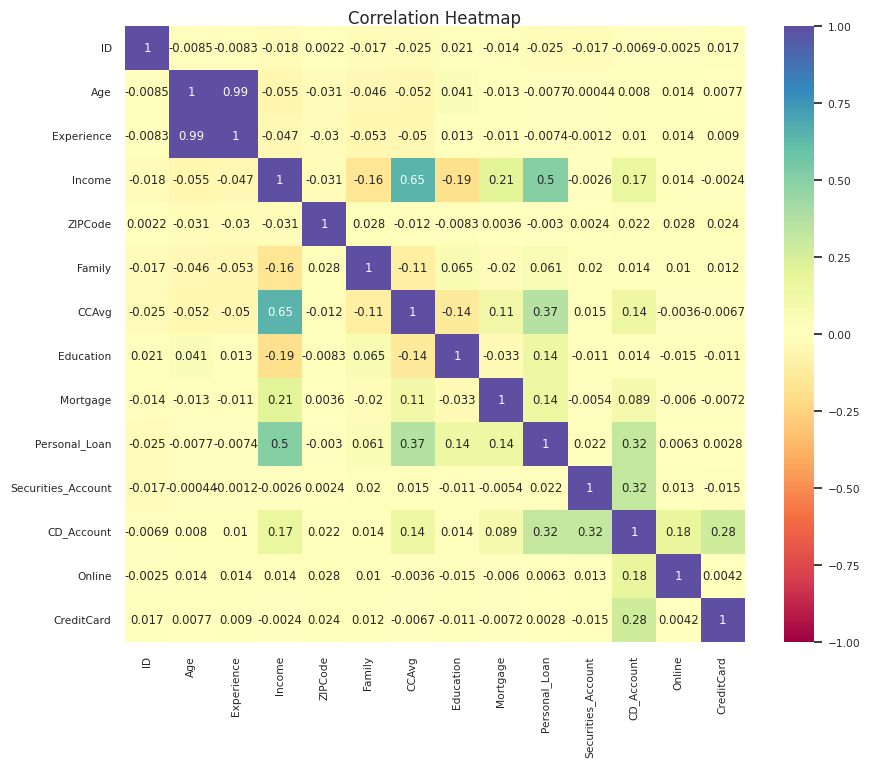

In [21]:
plt.figure(figsize=(10,8))
sns.set(font_scale =0.7)

heatmap = sns.heatmap(customer_df.corr(), vmin=-1, vmax=1, annot=True, cmap='Spectral')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=2);

The strongest positive correlation is between Age and Experience, meaning the more age, the more experience. The second largest positive correlation is between Income and CCAvg meaning that the more income, the more average monthly spending on the credit card.
Interstingly Personal_loan have relatively strong correlation with Income, CCAvg and CD_Account.

### Checking for Anomalous Values

In [22]:
# Replacing values in Education with meaningful strings namely 1: Undergrad; 2: Graduate 3: Advanced/Professional
customer_df["Education"].replace(1, "Undergraduate", inplace=True)
customer_df["Education"].replace(2, "Graduate", inplace=True)
customer_df["Education"].replace(3, "Professional", inplace=True)

Numbers of 1, 2 and 3 are replaced with meaningful strings of Undergraduate, Graduate and Professional.

* Treating the negative values of Experience: We assume that these negative signs here are data input errors, so we will replace them with positive signs

In [23]:
# Correcting the anomalous experience values
customer_df["Experience"].replace(-1, 1, inplace=True)
customer_df["Experience"].replace(-2, 2, inplace=True)
customer_df["Experience"].replace(-3, 3, inplace=True)
customer_df[customer_df["Experience"] < 0]["Experience"].unique()

array([], dtype=int64)

Anomalus values in the Experience are replaced with meaningful numbers.

### Feature Engineering

In [24]:
# A piece of code to search for the columns with an 'object' datatype and converting them into categorical variables
for feature in customer_df.columns: # Loop through all columns in the dataframe
    if customer_df[feature].dtype == 'object': # Only apply for columns with categorical strings
        customer_df[feature] = pd.Categorical(customer_df[feature])# Replace strings with an integer
customer_df.head(10)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,Undergraduate,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,Undergraduate,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,Undergraduate,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,Graduate,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,Graduate,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,Graduate,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,Graduate,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,Professional,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,Graduate,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,Professional,0,1,0,0,0,0


Although there are no objects in the dataset, the piece of code is written here as a general tool to check for objects and replace strings with an integer which is a part of data sanity check in general for the model build.

In [25]:
# Counting the number of uniques in the zip code
customer_df["ZIPCode"].nunique()

467

In [26]:
customer_df["ZIPCode"] = customer_df["ZIPCode"].astype(str)
print(
    "Number of unique values if we take first two digits of ZIPCode: ",
    customer_df["ZIPCode"].str[0:2].nunique(),
)
customer_df["ZIPCode"] = customer_df["ZIPCode"].str[0:2]

customer_df["ZIPCode"] = customer_df["ZIPCode"].astype("category")

Number of unique values if we take first two digits of ZIPCode:  7


In [27]:
# To convert categorical features to 'category' data type
cat_cols = [
    "Education",
    "Personal_Loan",
    "Securities_Account",
    "CD_Account",
    "Online",
    "CreditCard",
    "ZIPCode",
]
customer_df[cat_cols] = customer_df[cat_cols].astype("category")    # Complete the code to convert the cat_cols to category

In [28]:
# To check updated data types in the dataset
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  5000 non-null   int64   
 1   Age                 5000 non-null   int64   
 2   Experience          5000 non-null   int64   
 3   Income              5000 non-null   int64   
 4   ZIPCode             5000 non-null   category
 5   Family              5000 non-null   int64   
 6   CCAvg               5000 non-null   float64 
 7   Education           5000 non-null   category
 8   Mortgage            5000 non-null   int64   
 9   Personal_Loan       5000 non-null   category
 10  Securities_Account  5000 non-null   category
 11  CD_Account          5000 non-null   category
 12  Online              5000 non-null   category
 13  CreditCard          5000 non-null   category
dtypes: category(7), float64(1), int64(6)
memory usage: 308.8 KB


We have converted columns with categorial nature into "category" data type so that we assign them dummy values in the model build.

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

Answers:
1. It is highly right skewed, with a significant number of outliers. The plot shows that 75% of customers have no mortage or a mortgage size of less than 100k.
2. 1470 customers have a creditcard.
3. Personal_loan have relatively strong correlation with Income, CCAvg and CD_Account.
4. 75% of customers who approved or declined a personal offer are mainly between 25 to 65 years old. Customers younger than 25 and older than 65 are less likely to take a personal loan. There is hardly any correlation between the Age and Personal_Loan and outliers are not massively impactful on the conclusions.
5. Customers with Professional degree have the most chance of taking a personal loans with the bank.


### Univariate Analysis

In [29]:
# Defining a function to create histogram box plots
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [30]:
# Defining a function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on Age

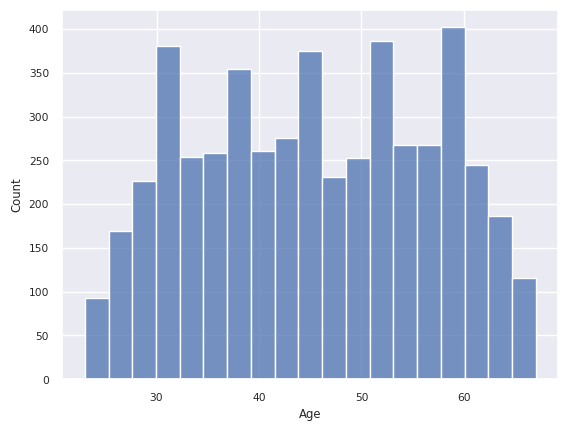

In [31]:
# Checking count of Age in a histplot
sns.histplot(data=customer_df,x='Age')
plt.show()

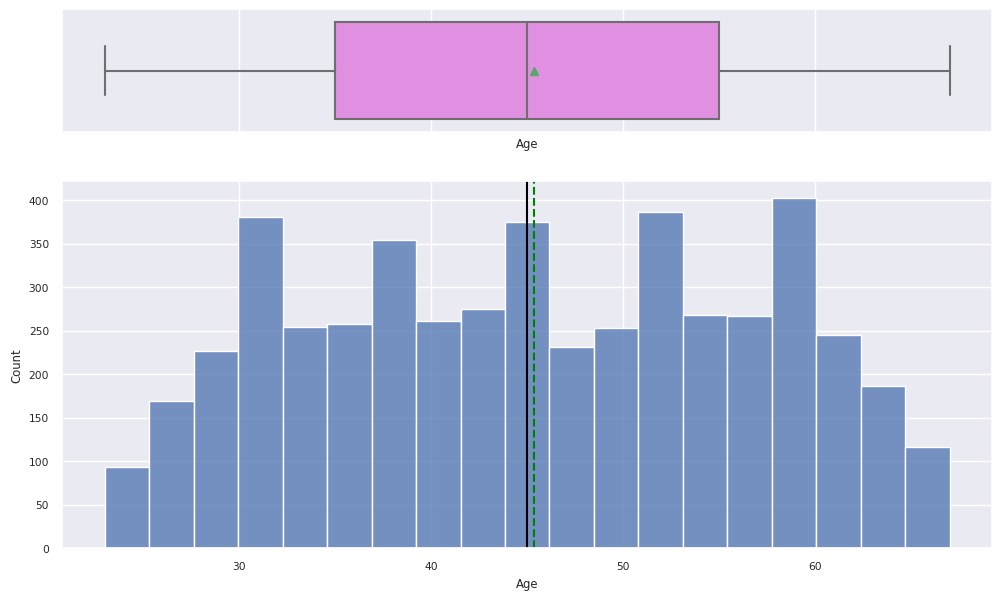

In [32]:
# Checking count of Age in a histogram box plots
histogram_boxplot(customer_df, "Age")

It is observed that mean and median age of customers is about 45 while 75% of customers are between about 35 and 55. There is almost no skewness in the Age of cusomters.

#### Observations on Experience

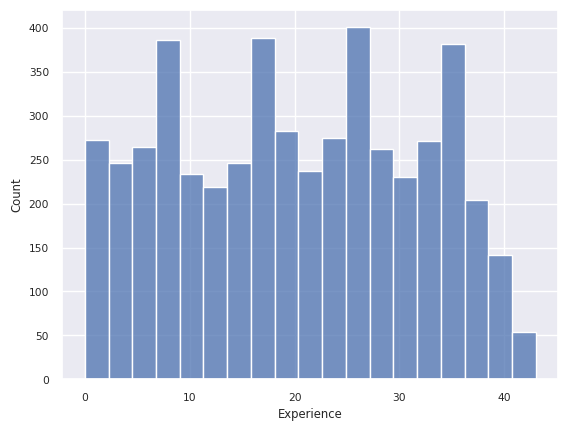

In [33]:
# Checking count of Experience in a histplot
sns.histplot(data=customer_df,x='Experience')
plt.show()

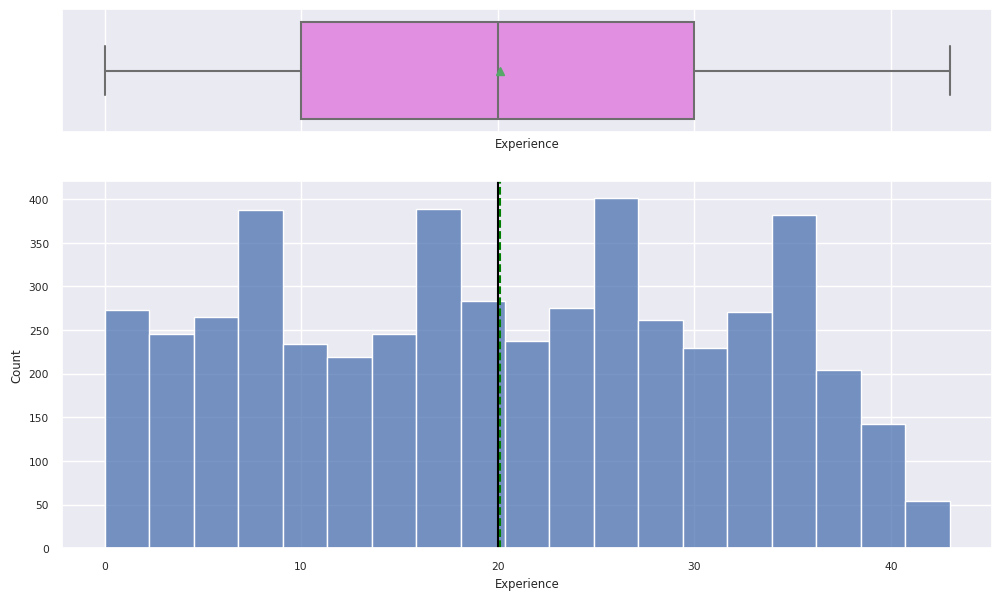

In [34]:
# Checking count of Experience in a histogram box plots
histogram_boxplot(customer_df, "Experience")

It is observed that mean and median Experience of customers is about 20 while 75% customers have Experience of between 10 and 30 years old. There is almost no skewness in the Experience of cusomters.

#### Observations on Income

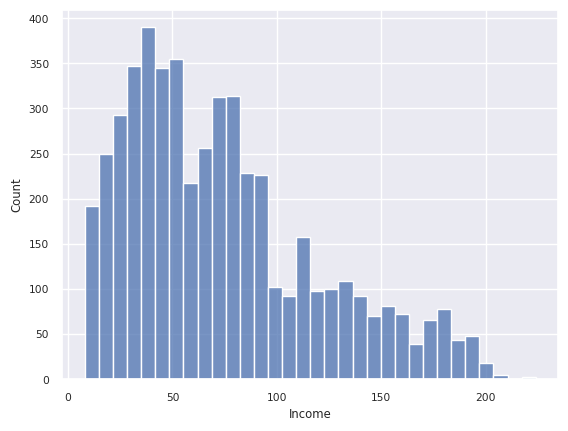

In [35]:
# Checking count of Income in a histplot
sns.histplot(data=customer_df,x='Income')
plt.show()

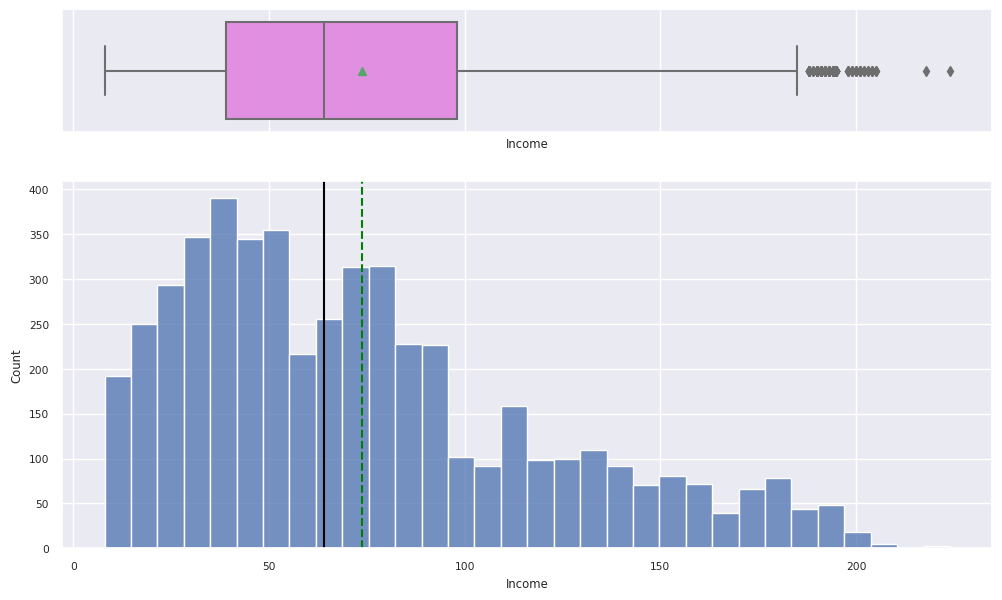

In [36]:
# Checking count of Income in a histogram box plots
histogram_boxplot(customer_df, "Income")

It is observed that there is a right skewness in the Income of cusomters while 75% of customers have Income between 39 and 98 and only about 25% have Income of higher than 98.

#### Observations on CCAvg

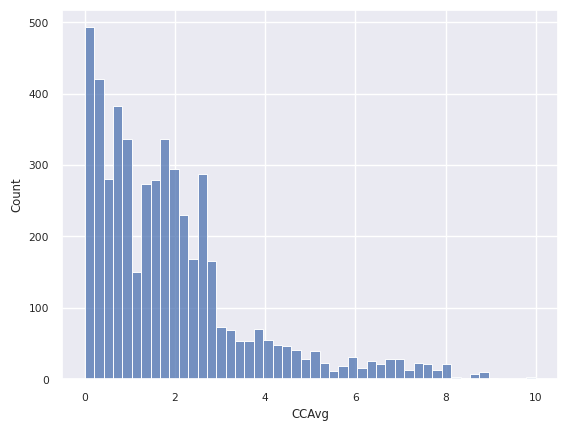

In [37]:
# Checking count of CCAvg in a histplot
sns.histplot(data=customer_df,x='CCAvg')
plt.show()

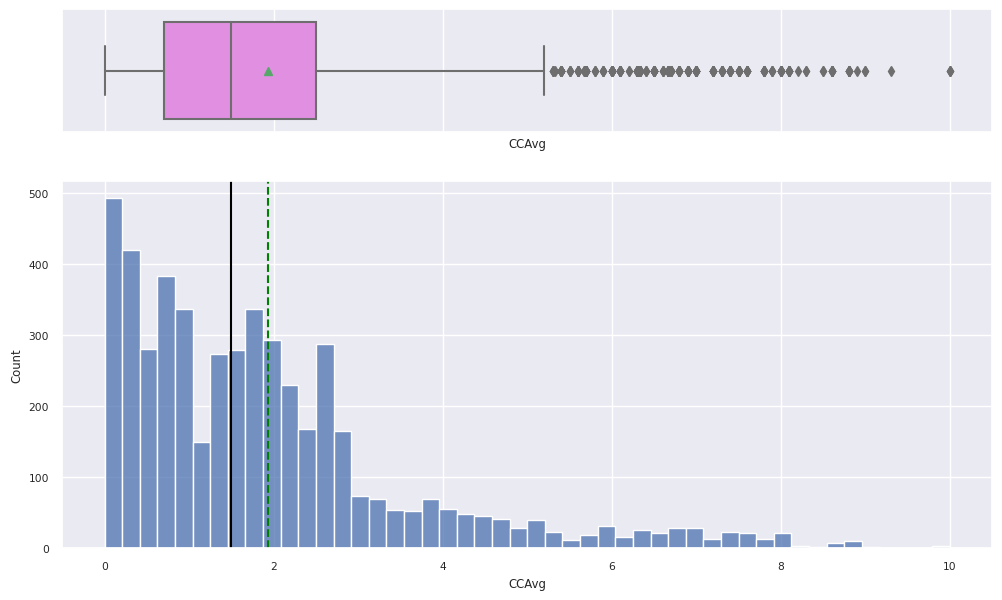

In [38]:
# Checking count of CCAvg in a histogram box plots
histogram_boxplot(customer_df, "CCAvg")

It is observed that there is a right skewness in the CCAvg and %75 of customers have average spending of between 0.7 and 2.5 tousand dollars per month.

#### Observations on Mortgage

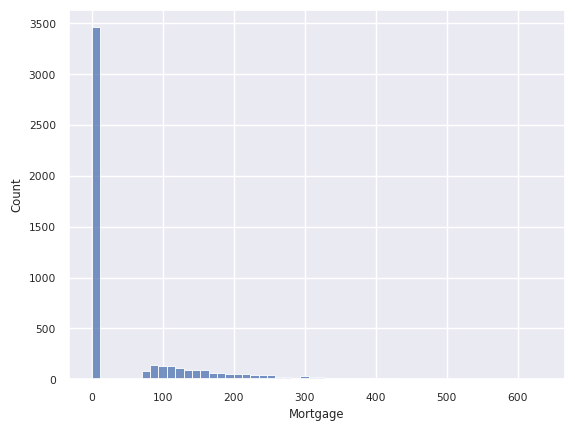

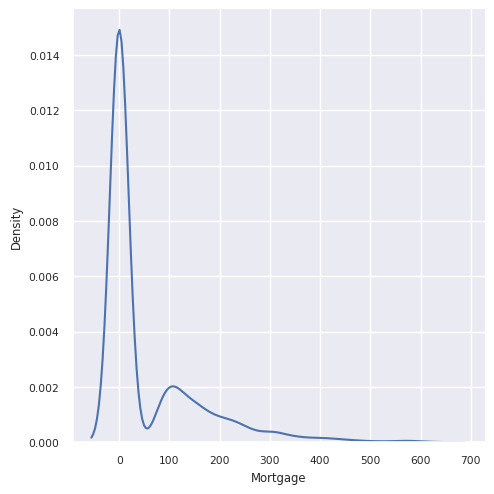

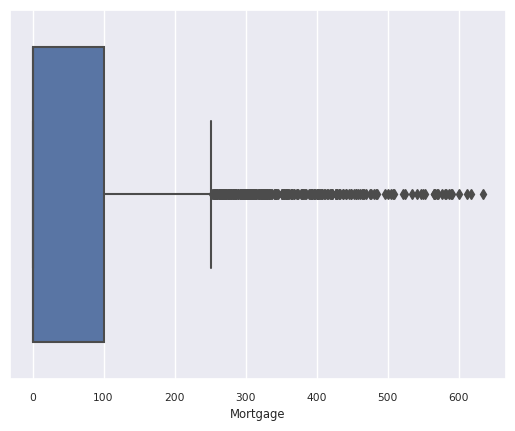

In [39]:
# Checking count of Mortgage in a histplot
sns.histplot(data=customer_df,x='Mortgage')
plt.show()
sns.displot(data=customer_df,x='Mortgage',kind='kde')
plt.show()
sns.boxplot(data=customer_df,x='Mortgage')
plt.show()

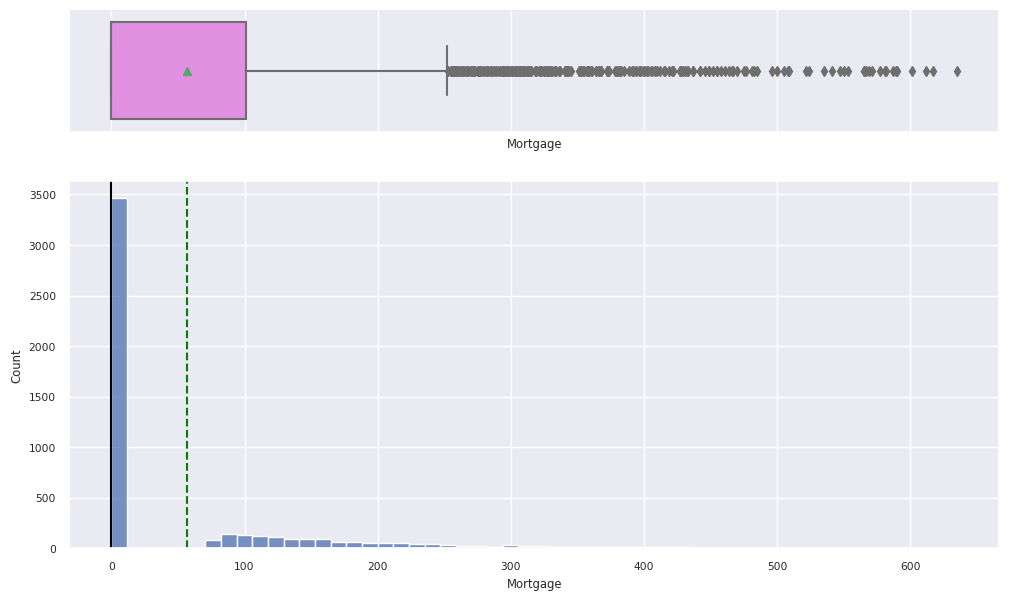

In [40]:
# Checking count of Mortgage in a histogram box plots
histogram_boxplot(customer_df, "Mortgage")

The plot shows that 75% of customers have no mortage or a mortgage size of less than 100k.

#### Observations on Family

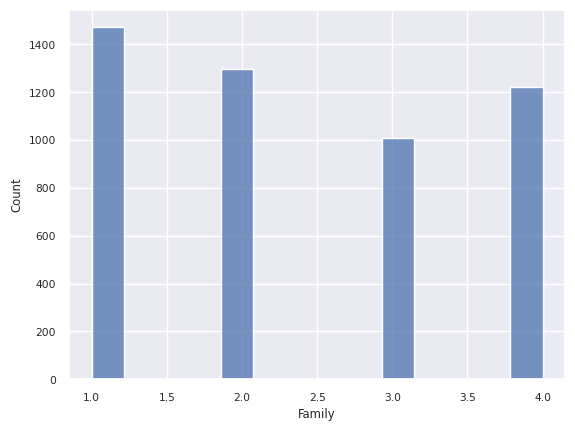

In [41]:
# Checking count of Family in a histplot
sns.histplot(data=customer_df,x='Family')
plt.show()

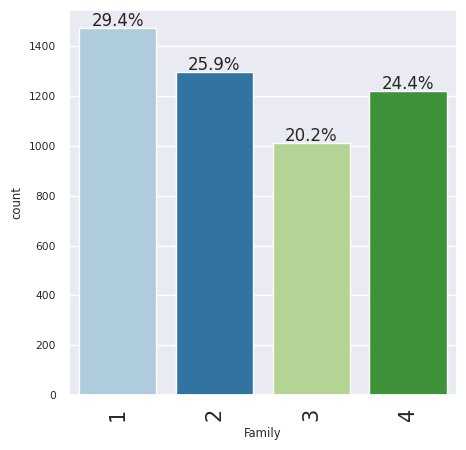

In [42]:
# Checking count of Family in a labeled bar plot
labeled_barplot(customer_df, "Family", perc=True)

It is observed that single people are most number of customers and then family size of 2, 4 and 3.

#### Observations on Education

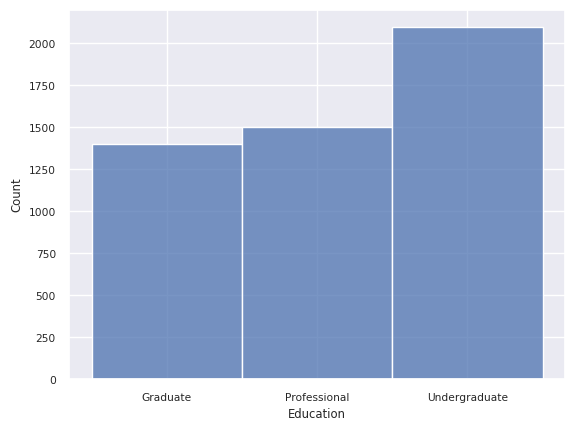

In [43]:
# Checking count of Education in a histplot
sns.histplot(data=customer_df,x='Education')
plt.show()

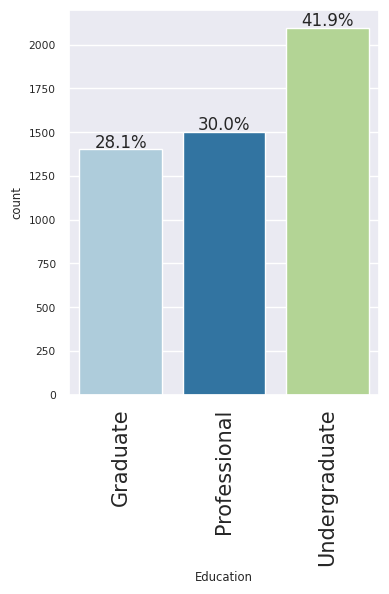

In [44]:
# Checking count of Education in a labeled bar plot
labeled_barplot(customer_df, "Education", perc=True)

It is observed that people with undergraduate degree are the highest number of customers and then professionals are the second highest and graduate degree holders are the least number of customers.

#### Observations on Securities_Account

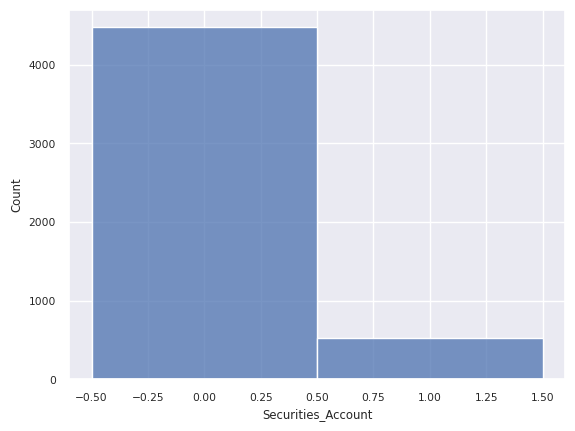

In [45]:
# Checking count of Securities_Account in a histplot
sns.histplot(data=customer_df,x='Securities_Account')
plt.show()

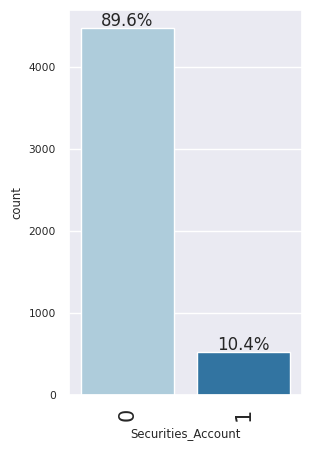

In [46]:
# Checking count of Education in a labeled bar plot
labeled_barplot(customer_df, "Securities_Account", perc=True)

It is observed that more than 89% of customers have no securities account with the bank.

#### Observations on CD_Account

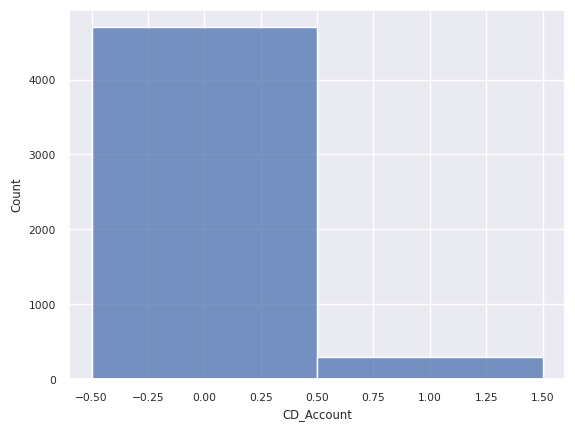

In [47]:
# Checking count of CD_Account in a histplot
sns.histplot(data=customer_df,x='CD_Account')
plt.show()

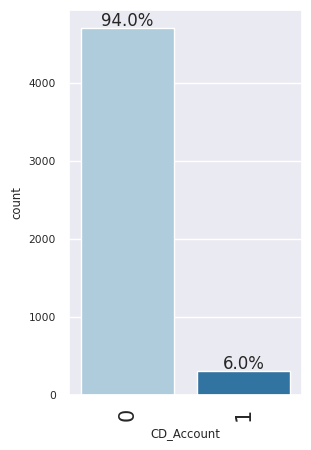

In [48]:
# Checking count of CD_Account in a labeled bar plot
labeled_barplot(customer_df, "CD_Account", perc=True)

It is observed that 94% of customers have a certificate of deposit account with the bank.

#### Observations on Online

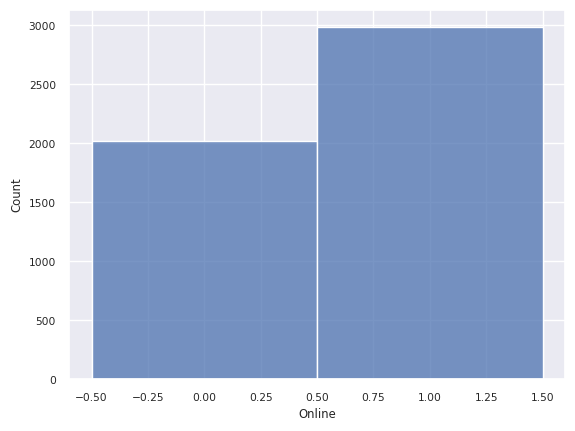

In [49]:
# Checking count of Online in a histplot
sns.histplot(data=customer_df,x='Online')
plt.show()

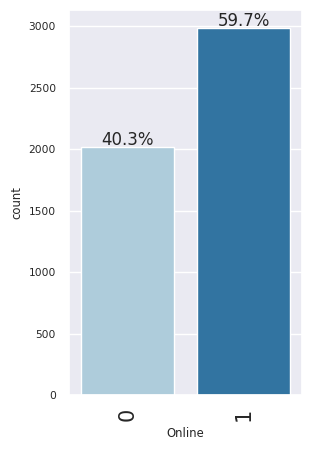

In [50]:
# Checking count of Online in a labeled bar plot
labeled_barplot(customer_df, "Online", perc=True)

There are about 59% of customers using online banking facilities while the other 40% not.

#### Observations on CreditCard

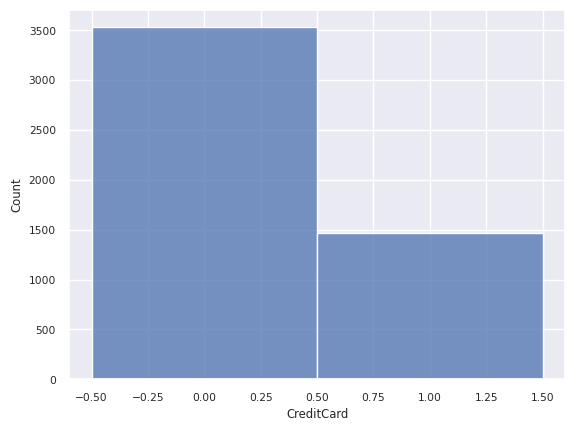

0    3530
1    1470
Name: CreditCard, dtype: int64

In [51]:
# Checking count of CreditCard in a histplot
sns.histplot(data=customer_df,x='CreditCard')
plt.show()
customer_df['CreditCard'].value_counts()

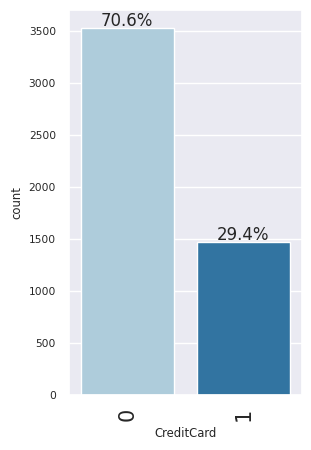

In [52]:
# Checking count of CreitCard in a labeled bar plot
labeled_barplot(customer_df, "CreditCard", perc=True)

About 70% of customers have a Credit Card with another bank while 30% not.

#### Observations on ZipCode

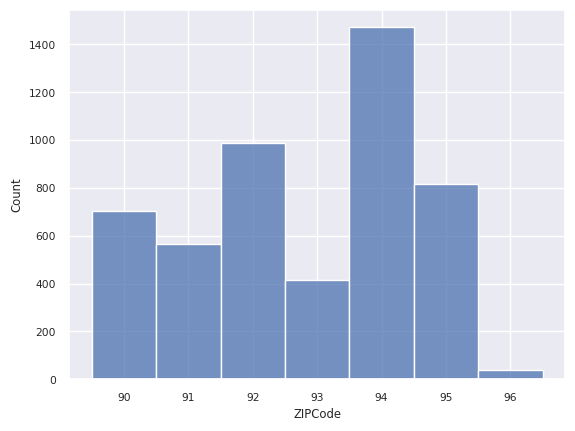

In [53]:
# Checking count of ZIPCode in a histplot
sns.histplot(data=customer_df,x='ZIPCode')
plt.show()

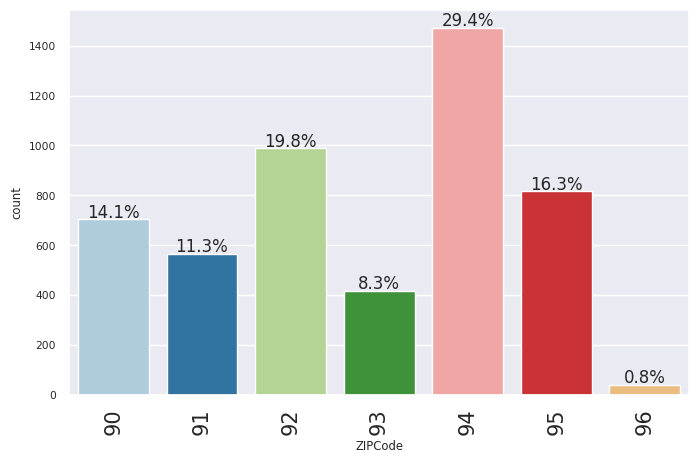

In [54]:
# Checking count of ZIPCode in a labeled bar plot
labeled_barplot(customer_df, "ZIPCode", perc=True)

Majority of customers are living around the ZIPCode starting with 94 while the least number of customers are living around the ZIP code starting 96.

#### Observations on Personal_Loan

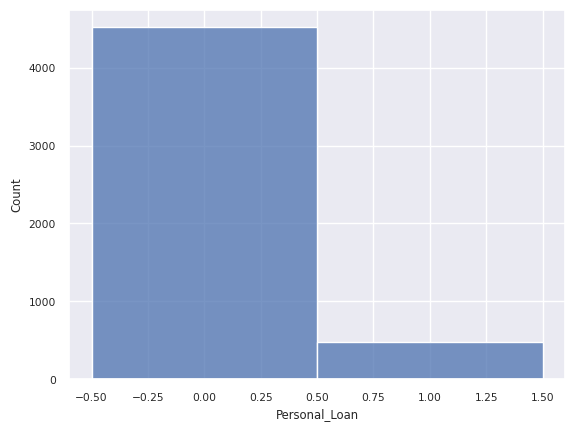

In [55]:
# Checking count of Personal_Loan in a histplot
sns.histplot(data=customer_df,x='Personal_Loan')
plt.show()

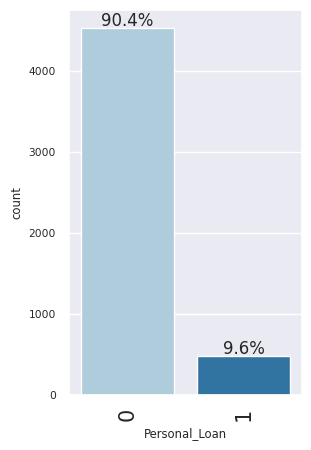

In [56]:
# Checking count of Personal in a labeled bar plot
labeled_barplot(customer_df, "Personal_Loan", perc=True)

Almost 90% of customers have not accepted any personal loan in the last campaign.

### Bivariate Analysis

In [57]:
# Defining a function to plot stacked barplot
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [58]:
# Defining a function to plot distribution of the taget
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

#### Let's check how a customer's interest in purchasing a loan varies with their education

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
Professional   1296  205  1501
Graduate       1221  182  1403
Undergraduate  2003   93  2096
------------------------------------------------------------------------------------------------------------------------


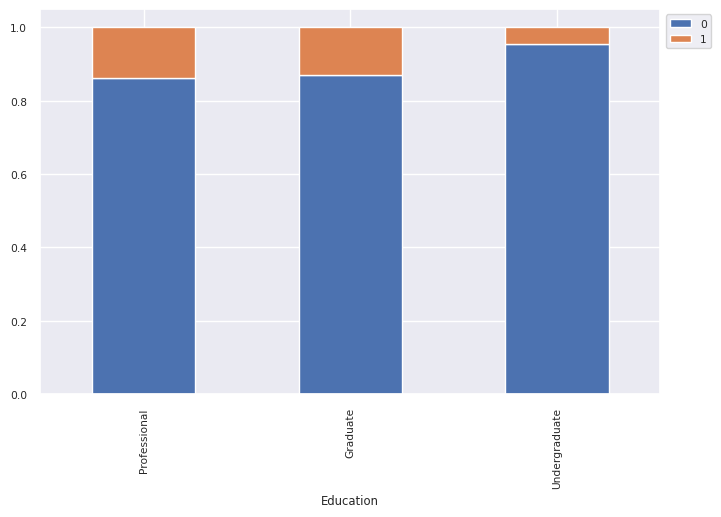

In [59]:
# Checking stacked barplot for Education and Personal_Loan
stacked_barplot(customer_df, "Education", "Personal_Loan")

It can be seen majority with different educational background have not accepted perosonal loans. Among them customers with Undersraduate degree have the most number of people who did not accept a personal loan.

#### Personal_Loan vs Family

Personal_Loan     0    1   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
------------------------------------------------------------------------------------------------------------------------


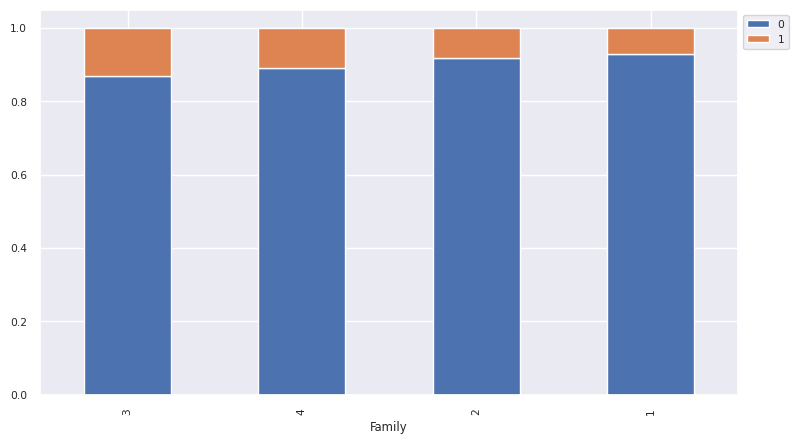

In [60]:
# Checking stacked barplot for Personal_Loan and Family
stacked_barplot(customer_df, "Family", "Personal_Loan")

It is seen that majority of customers with all Family sizes have not accepted a personal loan. Among them the single people have the highest number of declining personal loan offer customers.

#### Personal_Loan vs Securities_Account

Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
------------------------------------------------------------------------------------------------------------------------


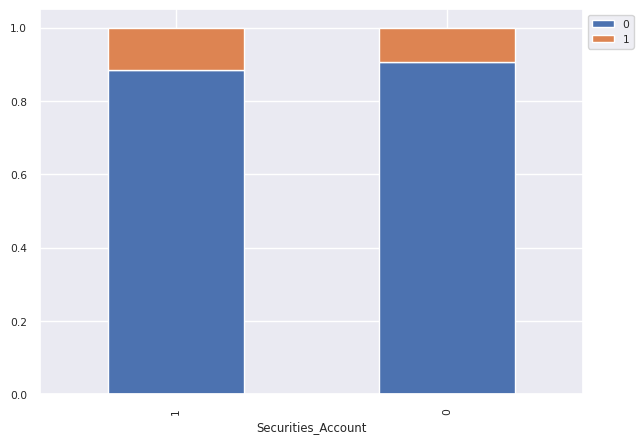

In [61]:
# Checking stacked barplot for Personal_Loan and Securities_Account
stacked_barplot(customer_df, "Securities_Account", "Personal_Loan")

It can be seen that Majority of customers with and without a security account have not accepted any personal loans. Among them customers without a security account have the highest amount of people who declined a personal loan.

#### Personal_Loan vs CD_Account

Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------


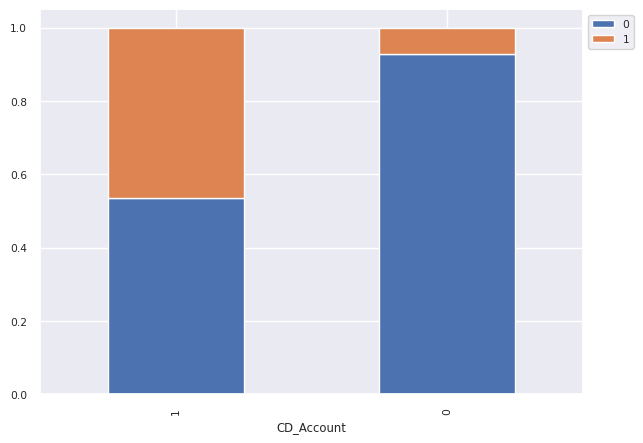

In [62]:
# Checking stacked barplot for Personal_Loan and CD_Account
stacked_barplot(customer_df, "CD_Account", "Personal_Loan")

It is seen that majority of customers without a CD account with the bank have not accepted a personal loan offer. However, nearly half of the customers with a CD account have accepted a personal loan.

#### Personal_Loan vs Online

Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
------------------------------------------------------------------------------------------------------------------------


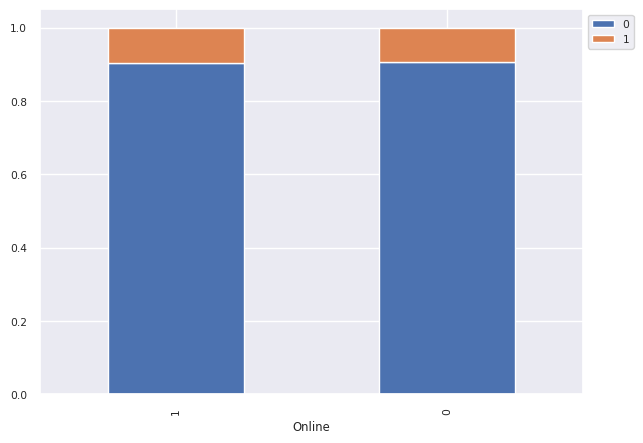

In [63]:
# Checking stacked barplot for Personal_Loan and Online
stacked_barplot(customer_df, "Online", "Personal_Loan")

It is observed that majority of customer with and without online banking facilities have not accepted a personal loan. Among them customer without online banking facility have higher number of people who declined a personal loan offer.

#### Personal_Loan vs CreditCard

Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470
------------------------------------------------------------------------------------------------------------------------


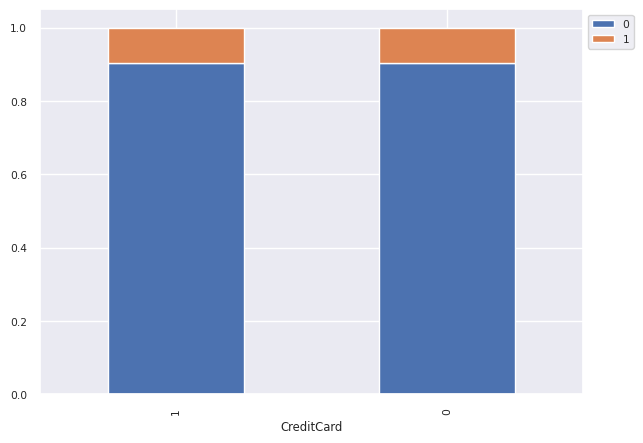

In [64]:
# Checking stacked barplot for Personal_Loan and CreditCard
stacked_barplot(customer_df, "CreditCard", "Personal_Loan")

Majority of cusotmers with and without Credit Card by any other bank have not accepted any personal loan. Among them customers without a Credit Card by any other bank have highest number of people who declined a personal loan offer.

#### Personal_Loan vs ZIPCode

Personal_Loan     0    1   All
ZIPCode                       
All            4520  480  5000
94             1334  138  1472
92              894   94   988
95              735   80   815
90              636   67   703
91              510   55   565
93              374   43   417
96               37    3    40
------------------------------------------------------------------------------------------------------------------------


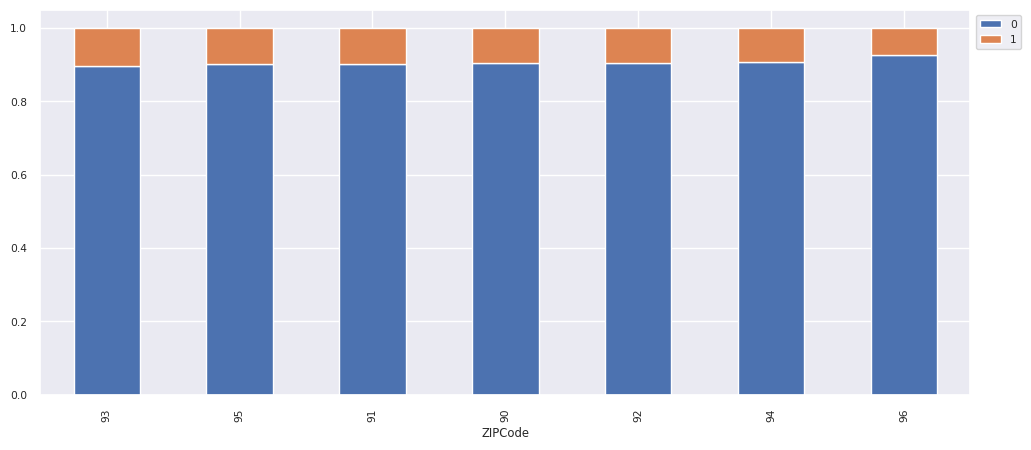

In [65]:
# Checking stacked barplot for Personal_Loan and ZIPCode
stacked_barplot(customer_df, "ZIPCode", "Personal_Loan")

Majority of customers from all zipcodes have not accepted a personal loan offer and this does not highly depend on a particular postcode.

#### Personal_Loan vs Age

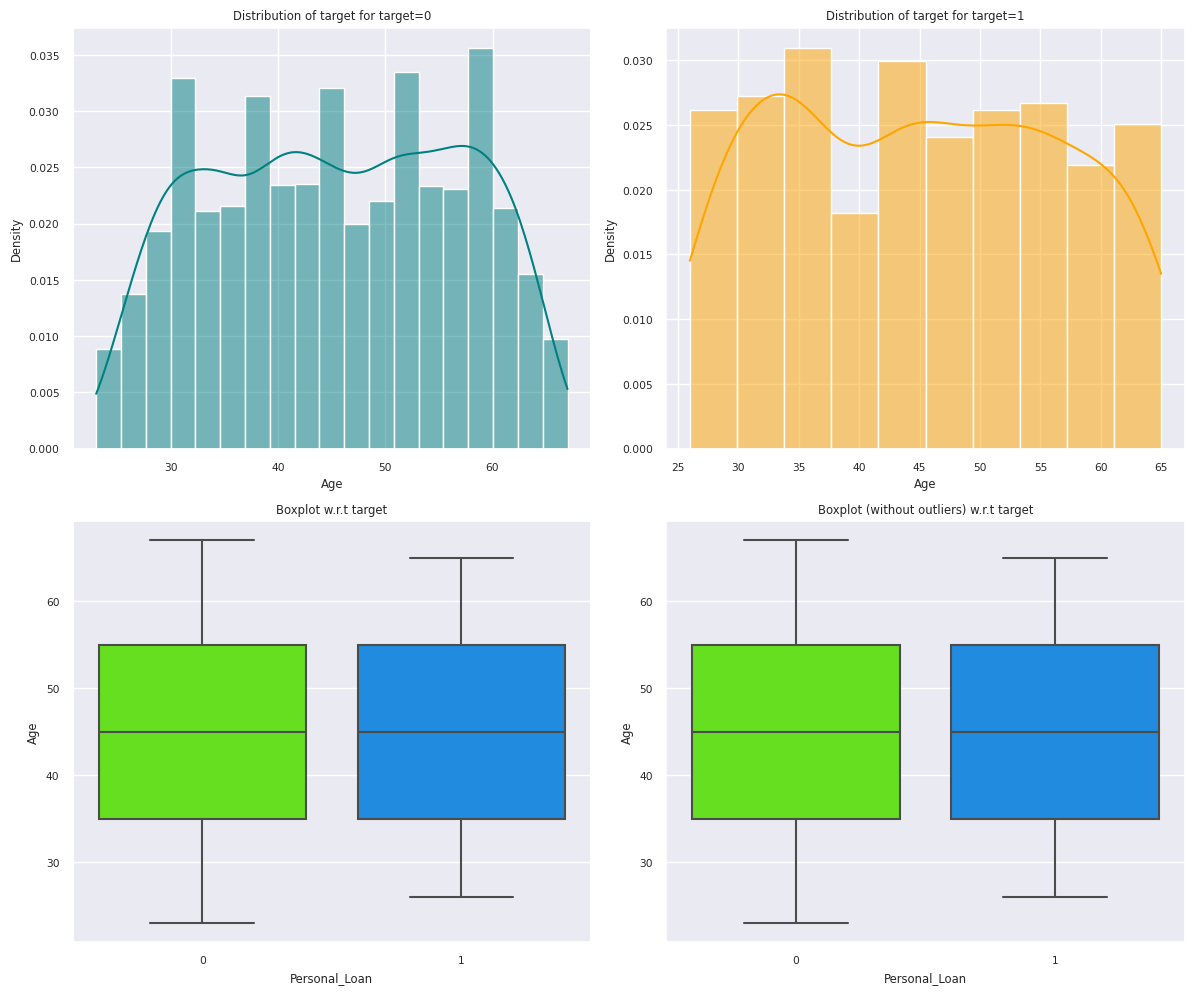

In [66]:
# Checking Distribution of Target for Personal_Loan and Age
distribution_plot_wrt_target(customer_df, "Age", "Personal_Loan")

75% of customers who approved or declined a personal offer are mainly between 35 to 55 years old. There is hardly any correlation between the Age and Personal_Loan and outliers are not massively impactful on the conclusions.

#### Personal_Loan vs Experience

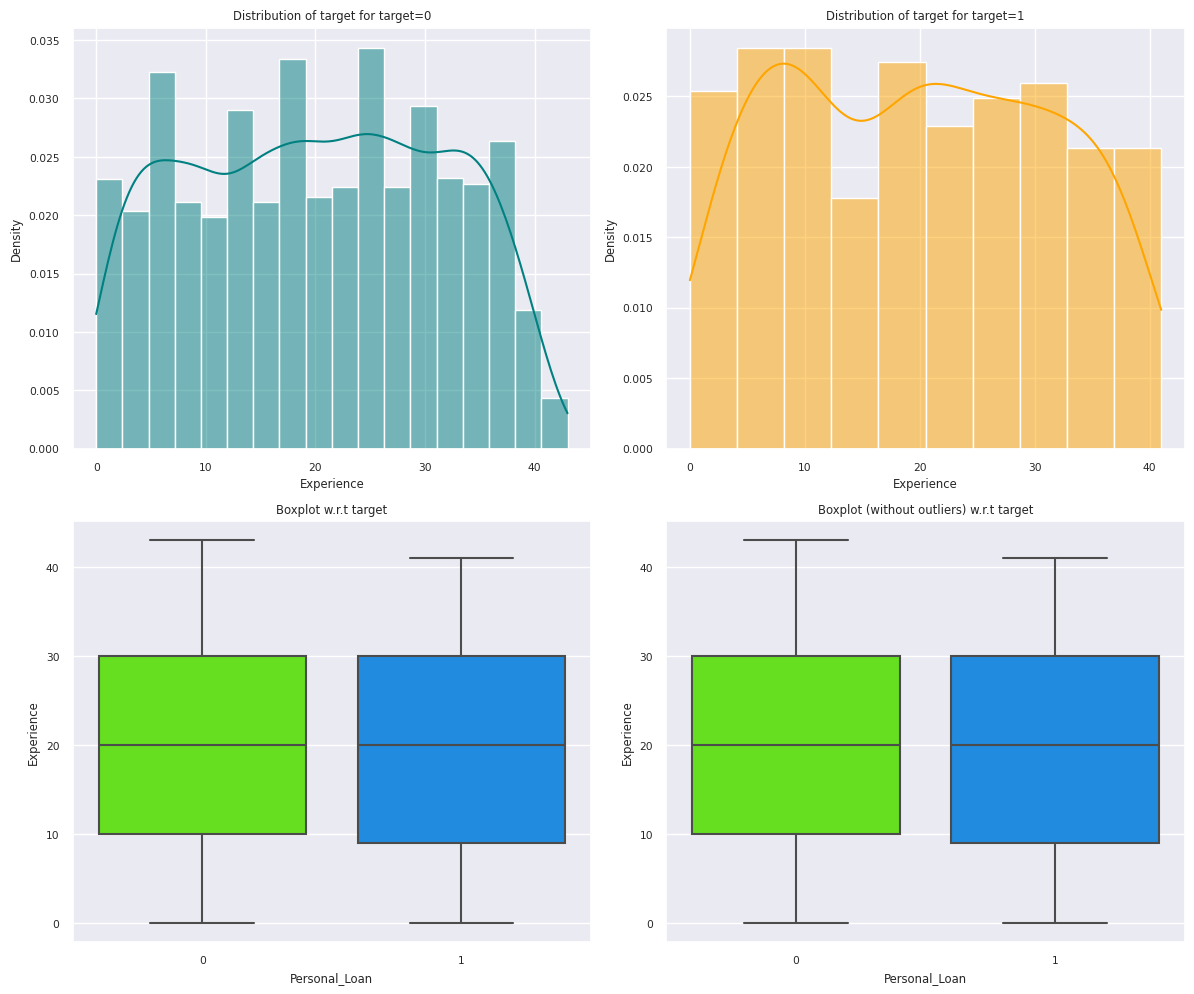

In [67]:
# Checking Distribution of Target for Personal_Loan and Experience
distribution_plot_wrt_target(customer_df, "Experience", "Personal_Loan")

75% of customers who approved or declined a personal offer have mainly between 10 to 30 years of experience. There is hardly any correlation between the Experience and Personal_Loan and outliers are not massively impactful on the conclusions.

#### Personal_Loan vs Income

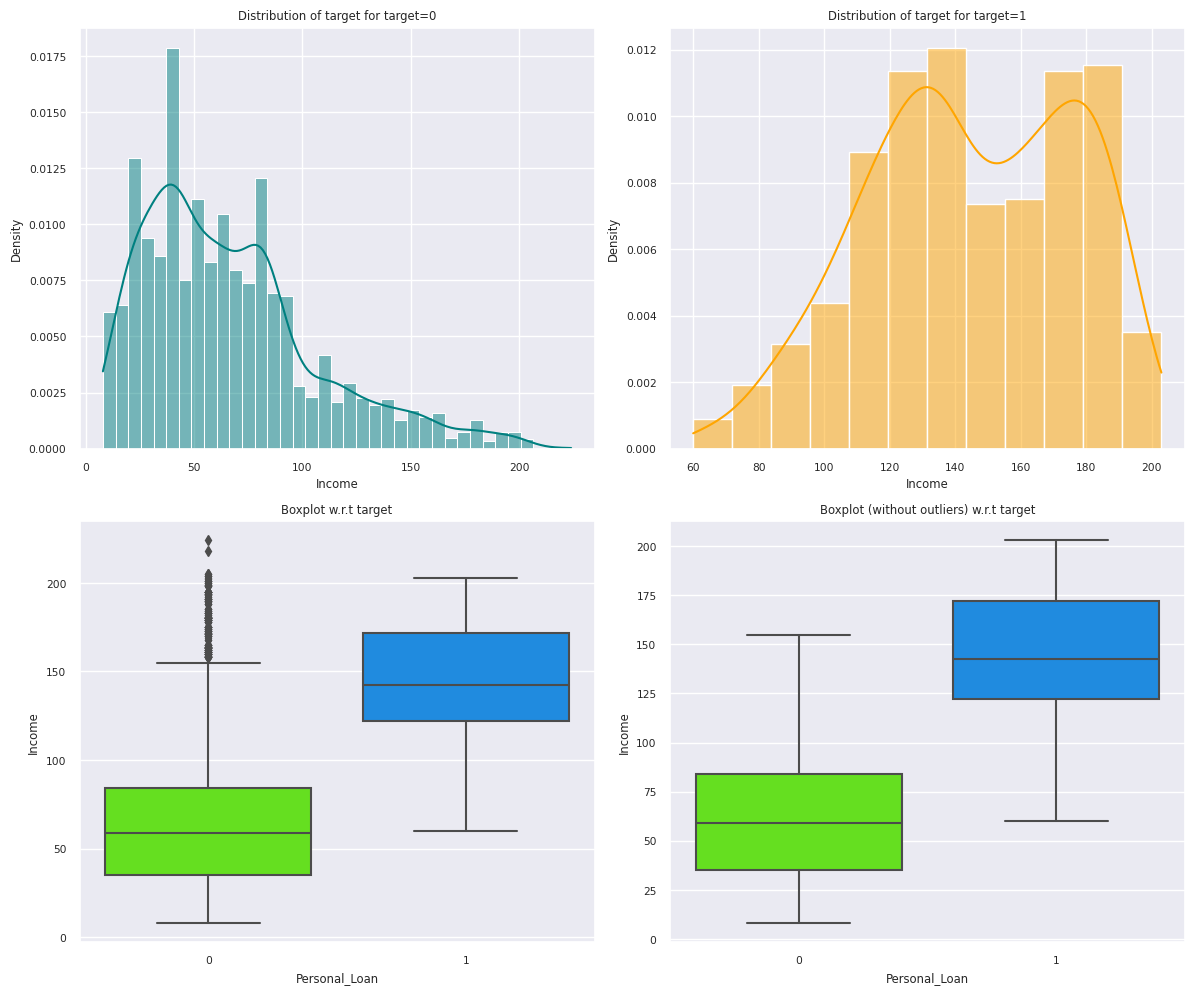

In [68]:
# Checking Distribution of Target for Personal_Loan and Income
distribution_plot_wrt_target(customer_df, "Income", "Personal_Loan")

75% of customers who declined a personal offer have mainly income below 80k dollars. On the other hand, 75% of customers who approved a personal loan have mainly income of above 120k dollars. There is a correlation between the Income and Personal_Loan approval rate increases by increasing income and vice versa. Outliers are not massively impactful on the conclusions.

#### Personal_Loan vs CCAvg

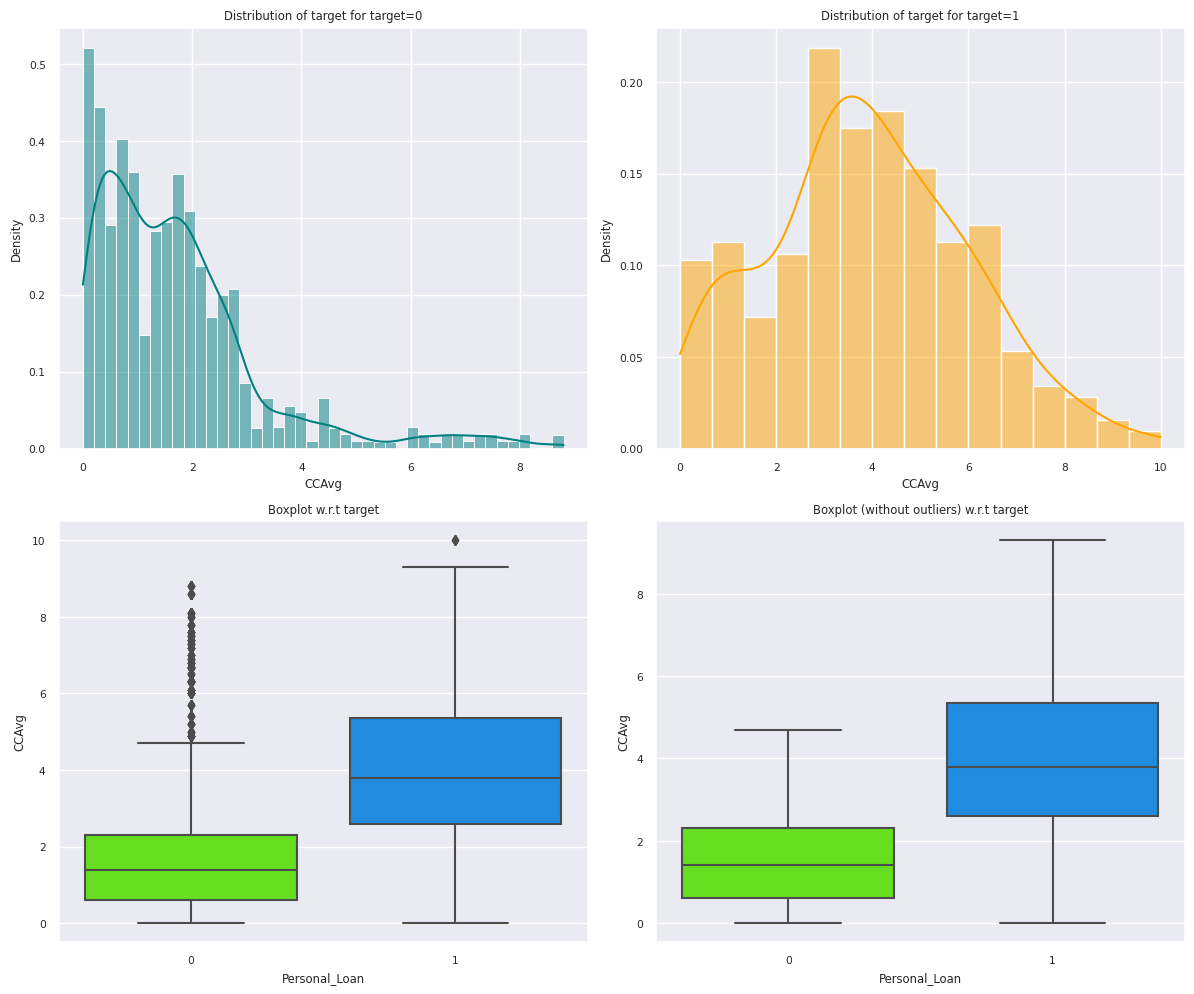

In [69]:
# Checking Distribution of Target for Personal_Loan and CCAvg
distribution_plot_wrt_target(customer_df, "CCAvg", "Personal_Loan")

75% of customers who declined a personal offer have mainly Average Credit Card usuage of below 2100 dollars. On the other hand, 75% of customers who approved a personal loan have mainly Average Credit Card usuage of between about 2200 and 5000 dollars. There is a correlation between the CCAvg and Personal_Loan approval rate increases by CCAvg and vice versa. Outliers are not massively impactful on the conclusions.

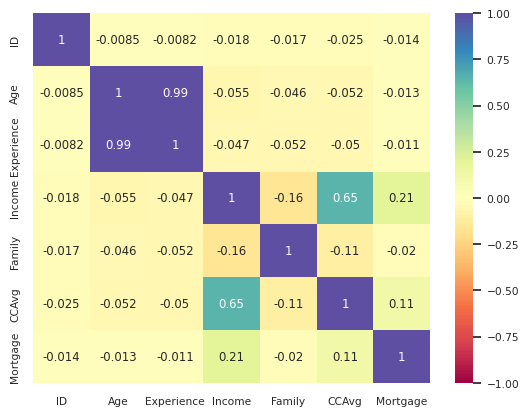

In [70]:
# To obtain a more distinctive heatmap
heatmap = sns.heatmap(customer_df.corr(), vmin=-1, vmax=1, annot=True, cmap='Spectral')

Age and Experience have a strong correlation. Second largest correlation is between CCAvg and Income.

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

### Outlier Detection

In [71]:
# To find the 25th percentile and 75th percentile.
Q1 = customer_df.quantile(0.25)
Q3 = customer_df.quantile(0.75)

# To find Inter Quantile Range
IQR = Q3 - Q1

# To find lower and upper bounds for all values
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

In [72]:
((customer_df.select_dtypes(include=["float64", "int64"]) < lower)
    |(customer_df.select_dtypes(include=["float64", "int64"]) > upper)
).sum() / len(customer_df) * 100

ID            0.00
Age           0.00
Experience    0.00
Income        1.92
Family        0.00
CCAvg         6.48
Mortgage      5.82
dtype: float64

### Data Preparation for Modeling

- The objective is to predict whether a liability customer will buy personal loans.
- Before you proceed to build a model, you need to split the data into train, test and validation to be able to evaluate the model that you build on the train data
- You'll have to encode categorical features and scale numerical values.
- You will build a model using the train data and then check it's performance

In [73]:
# Separate independent and dependent variable as Experience can always be found with other variable
X = customer_df.drop(["Personal_Loan", "Experience"], axis=1)
Y = customer_df["Personal_Loan"]

In [74]:
# To apply dummies on ZIPCode and Education
X = pd.get_dummies(X, columns=["ZIPCode", "Education"], drop_first=True)

# To split data in train and test sets with 30% ratio
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [75]:
# To get information about the shape and value counts of train data and test data
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3500, 18)
Shape of test set :  (1500, 18)
Percentage of classes in training set:
0    0.905429
1    0.094571
Name: Personal_Loan, dtype: float64
Percentage of classes in test set:
0    0.900667
1    0.099333
Name: Personal_Loan, dtype: float64


## Model Building

### Model Evaluation Criterion

**Model can make wrong predictions as:**

1. Predicting a customer will take the personal loan but in reality the customer will not take the personal loan - Loss of resources
2. Predicting a customer will not take the personal loan but in reality the customer was going to take the personal loan - Loss of opportunity

**Which case is more important?**
* Losing a potential customer by predicting that the customer will not be taking the personal loan but in reality the customer was going to take the personal loan.

**How to reduce this loss i.e need to reduce False Negatives?**

* Bank would want `Recall` to be maximized, greater the Recall higher the chances of minimizing false negatives. Hence, the focus should be on increasing Recall or minimizing the false negatives.


First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_sklearn_with_threshold function will be used to check the model performance of models.
* The confusion_matrix_sklearn_with_threshold function will be used to plot confusion matrix.

### Model Building

First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.

* The model_performance_classification_sklearn function will be used to check the model performance of models.
* The confusion_matrix_sklearnfunction will be used to plot confusion matrix.

In [76]:
# To defin a function to compute different metrics to check performance of a classification model built using sklearn library
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [77]:
# To define a function to compute confusion matrix to check performance of a classification model built using sklearn library
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [78]:
##  A function to calculate recall score
def calc_recall_score(model):

    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    # results printing
    print("Accuracy on training set is: ", metrics.accuracy_score(y_train,pred_train))
    print("Accuracy on test set is: ", metrics.accuracy_score(y_test,pred_test))

    print("Recall on training set is: ", metrics.recall_score(y_train,pred_train))
    print("Recall on test set is: ", metrics.recall_score(y_test,pred_test))

    print("Precision on training set is: ", metrics.precision_score(y_train,pred_train))
    print("Precision on test set is: ", metrics.precision_score(y_test,pred_test))

    print("F1_score on training set is: ", metrics.f1_score(y_train,pred_train))
    print("F1_score on test set is: ", metrics.f1_score(y_test,pred_test))

#### Build Decision Tree Model

In [79]:
# Initialize the Decision Tree Classifier
model = DecisionTreeClassifier(criterion='gini',class_weight={0:0.5,1:0.5},random_state=1) # weights for each class (for handling class imbalance)
model.fit(X_train, y_train) # fit the model on train set data

DecisionTreeClassifier(class_weight={0: 0.5, 1: 0.5}, random_state=1)

#### Checking model performance on training data

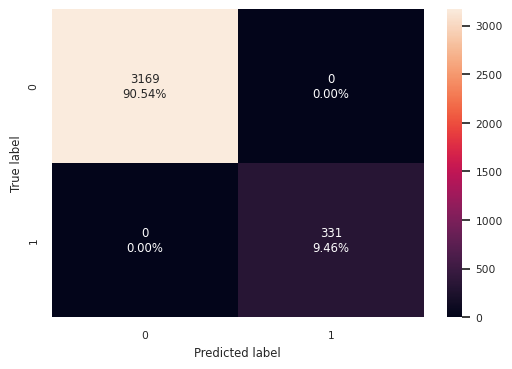

In [80]:
# Plot the confusion matrix of train data against train data
confusion_matrix_sklearn(model, X_train, y_train)

In [81]:
decision_tree_perf_train = model_performance_classification_sklearn(model, X_train, y_train)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


In [82]:
calc_recall_score(model)

Accuracy on training set is:  1.0
Accuracy on test set is:  0.9806666666666667
Recall on training set is:  1.0
Recall on test set is:  0.9194630872483222
Precision on training set is:  1.0
Precision on test set is:  0.8896103896103896
F1_score on training set is:  1.0
F1_score on test set is:  0.9042904290429042


It is observed the model is overfitted and in finance studies, the impact of False Negative (FN) in total losses is greater than the impact of False Positives (FP) and therefore Recall seems to be the best score, therefore, the goal is to maximise the recall.

#### Visualizing the Decision Tree

In [83]:
# To create a list of independent variable strings
feature_names = list(X_train.columns)
print(feature_names)

['ID', 'Age', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'ZIPCode_91', 'ZIPCode_92', 'ZIPCode_93', 'ZIPCode_94', 'ZIPCode_95', 'ZIPCode_96', 'Education_Professional', 'Education_Undergraduate']


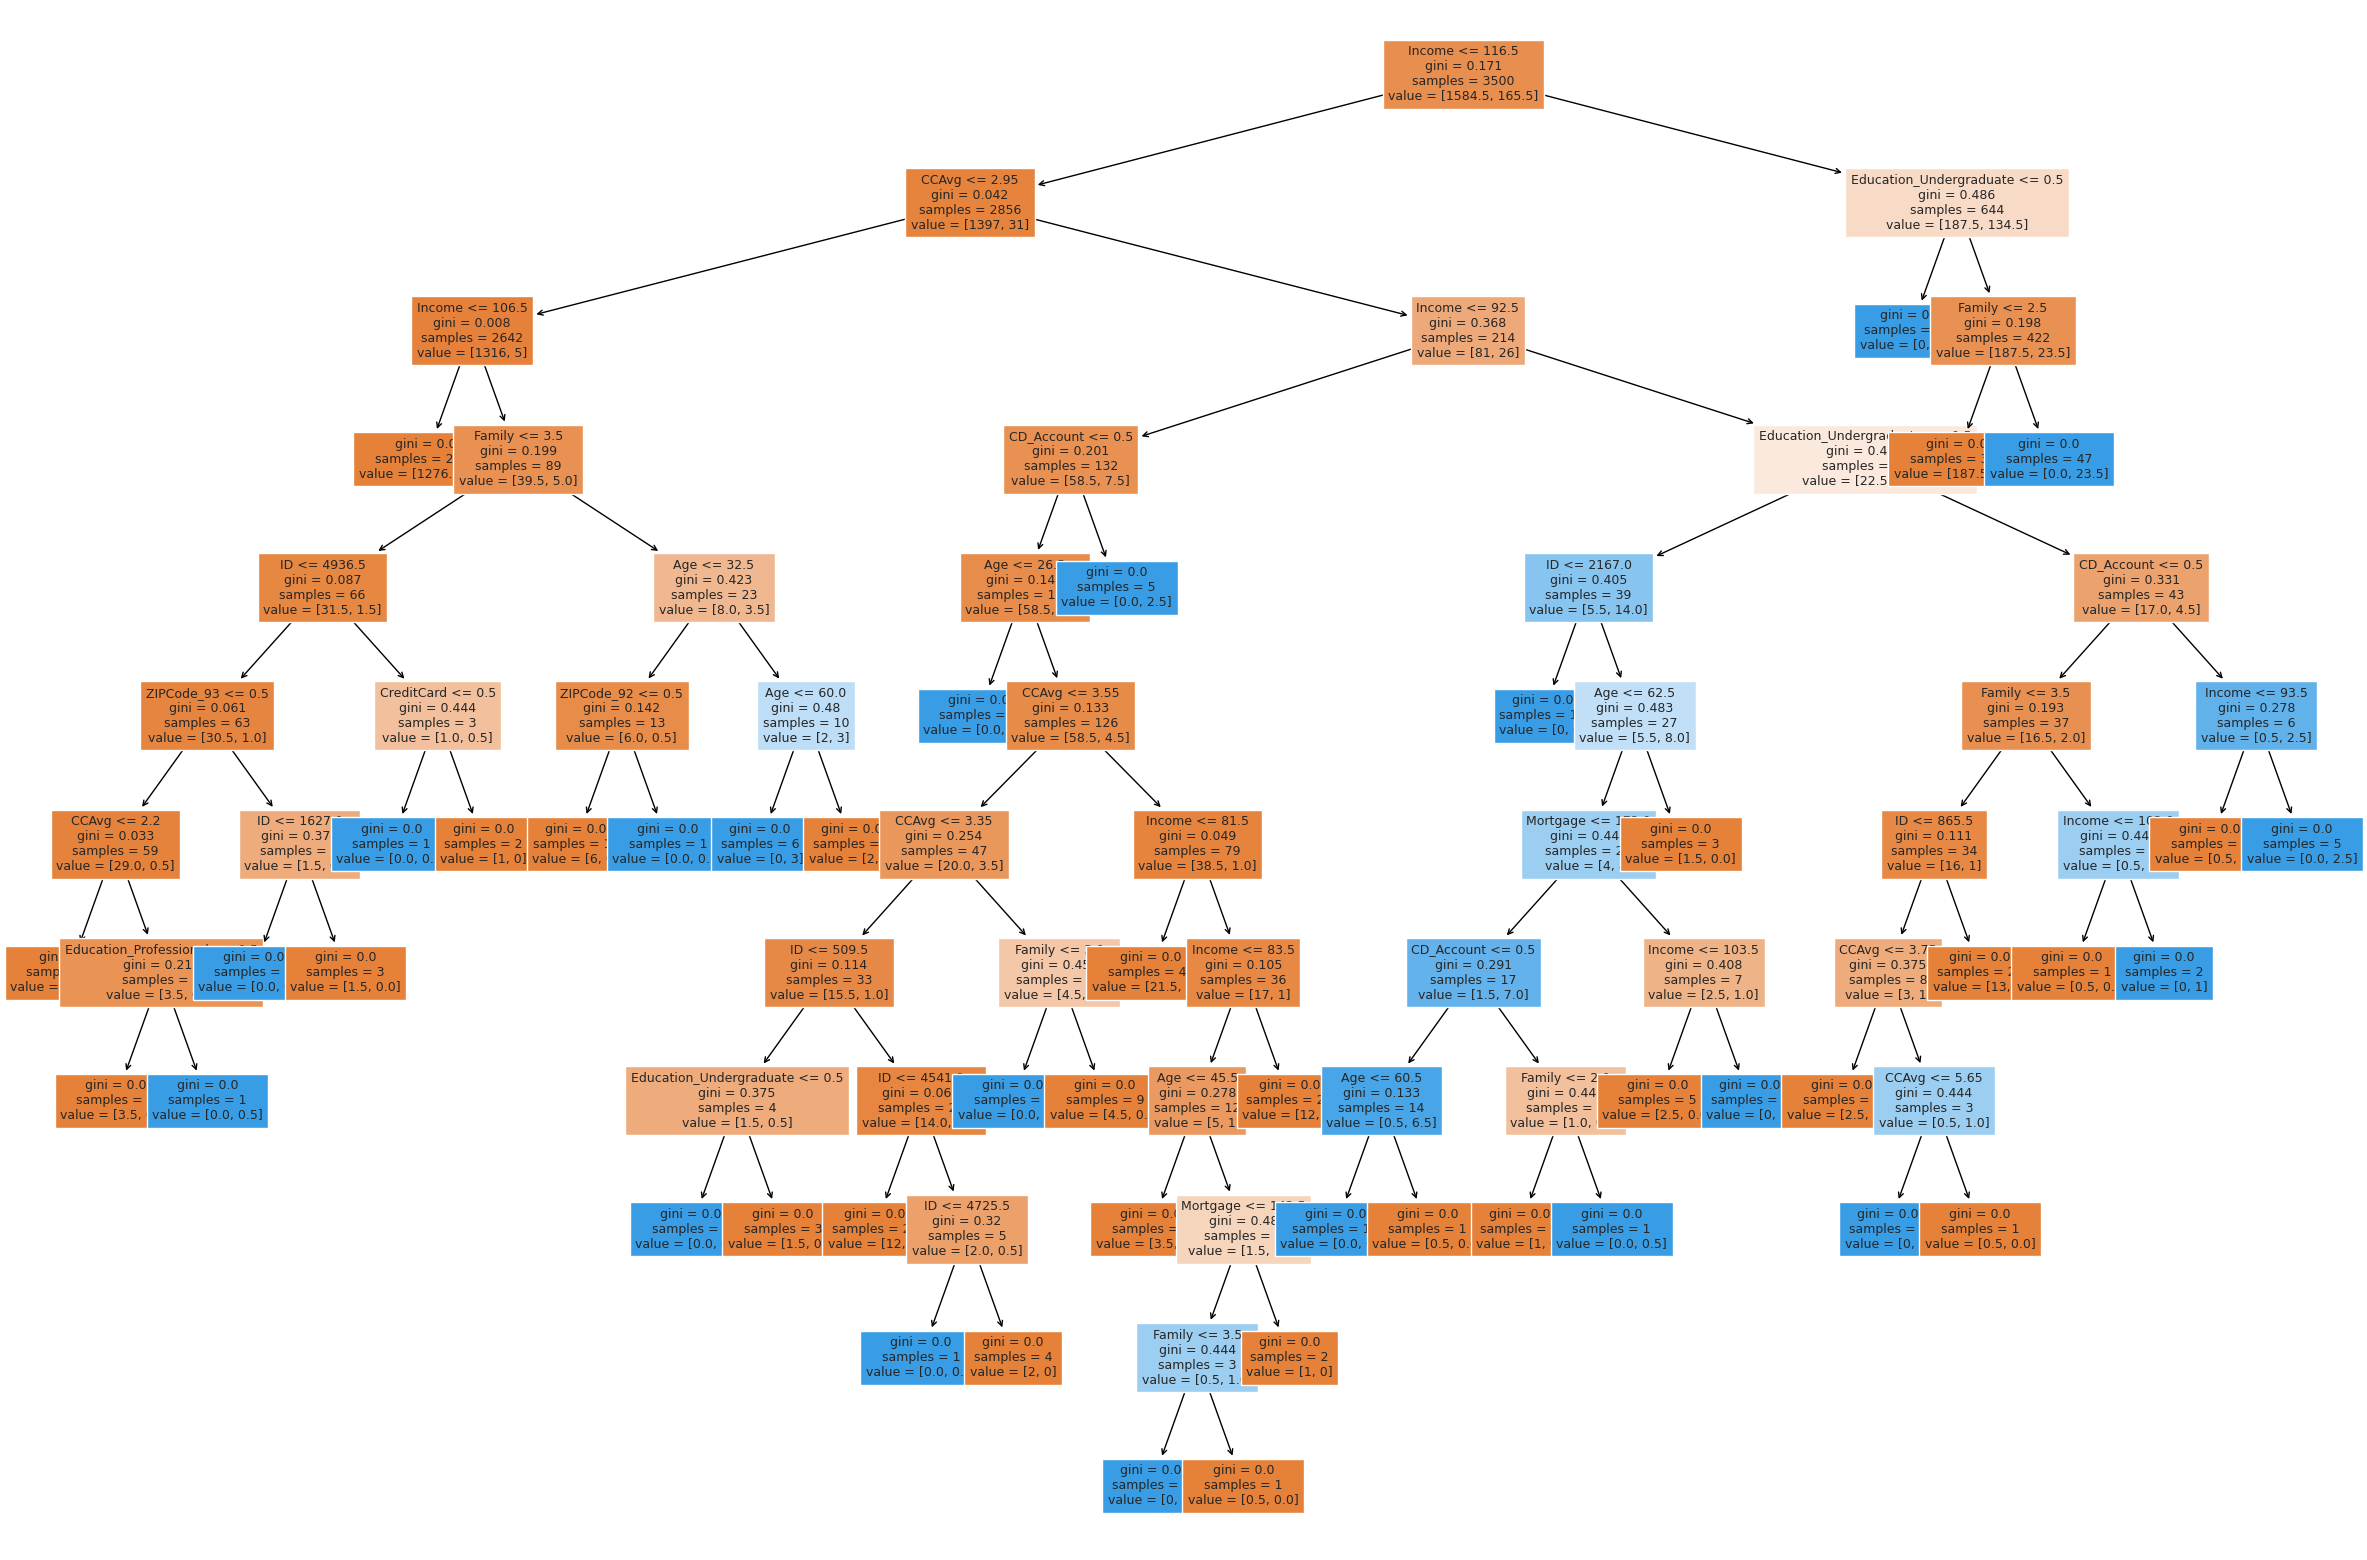

In [84]:
# To visualize the tree
plt.figure(figsize=(30, 20))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [85]:
# To print the rules of a decision tree
print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [1276.50, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- ID <= 4936.50
|   |   |   |   |   |--- ZIPCode_93 <= 0.50
|   |   |   |   |   |   |--- CCAvg <= 2.20
|   |   |   |   |   |   |   |--- weights: [25.50, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  2.20
|   |   |   |   |   |   |   |--- Education_Professional <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [3.50, 0.00] class: 0
|   |   |   |   |   |   |   |--- Education_Professional >  0.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 0.50] class: 1
|   |   |   |   |   |--- ZIPCode_93 >  0.50
|   |   |   |   |   |   |--- ID <= 1627.00
|   |   |   |   |   |   |   |--- weights: [0.00, 0.50] class: 1
|   |   |   |   |   |   |--- ID >  1627.00
|   |   |   |   |   |   |   |--- weights: [1.50, 0.00] class: 0
|   |   |   |   |--- ID >  4936.50
|   |   |   |   |   |--- 

In [86]:
# To calculated importance of features in the tree building meaning total reduction of the criterion brought by that feature.
print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                              Imp
Education_Undergraduate  0.403454
Income                   0.308531
Family                   0.161746
CCAvg                    0.047549
CD_Account               0.025604
Age                      0.024633
ID                       0.013015
Mortgage                 0.006565
ZIPCode_92               0.003080
Education_Professional   0.002920
CreditCard               0.002224
ZIPCode_93               0.000679
Securities_Account       0.000000
Online                   0.000000
ZIPCode_91               0.000000
ZIPCode_94               0.000000
ZIPCode_95               0.000000
ZIPCode_96               0.000000


It is observed that Education_Undergraduate, Income and Family accounts for the 80% of accuracy of the model.

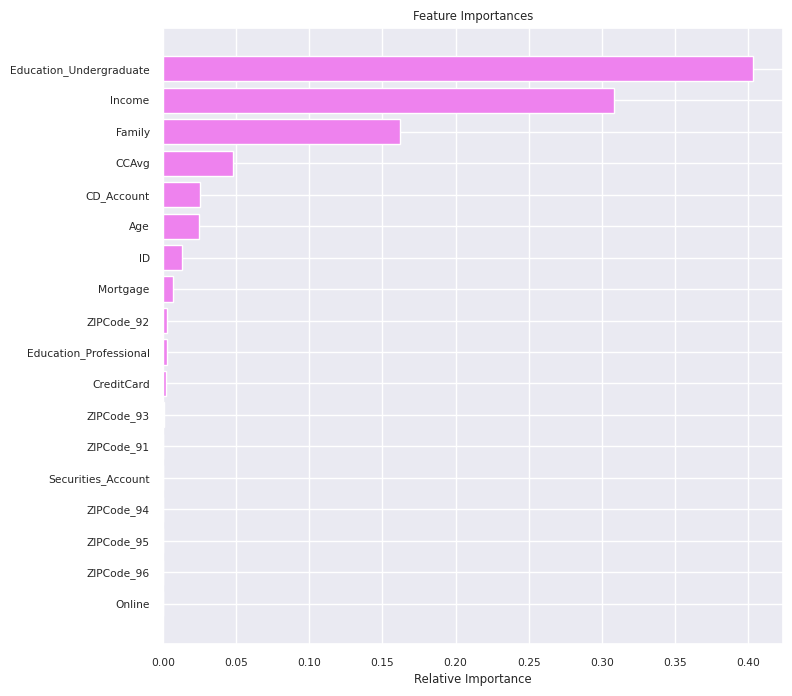

In [87]:
# To plot importance of features in the tree building meaning total reduction of the criterion brought by that feature.
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

It is observed that Education_Undergraduate, Income and Family accounts for the 80% of accuracy of the model.

#### Checking model performance on test data

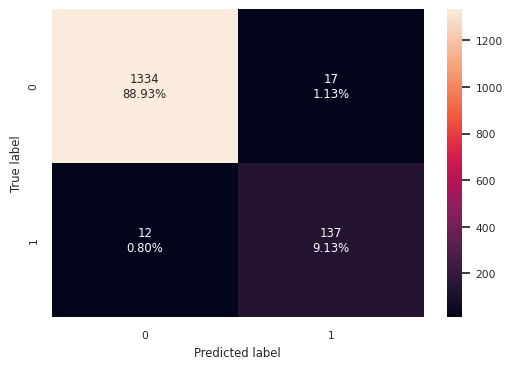

In [88]:
# To plot confusion matrix to measure accuracy of the model built by the train data against test data
confusion_matrix_sklearn(model, X_test, y_test)

In [89]:
decision_tree_perf_test = model_performance_classification_sklearn(model, X_test, y_test)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.980667,0.919463,0.88961,0.90429


## Model Comparison and Final Model Selection

#### Pre-Pruning

In [90]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1,class_weight={0: 0.5, 1: 0.5})

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(6, 15),
    "min_samples_leaf": [1, 2, 5, 7, 10],
    "max_leaf_nodes": [2, 3, 5, 10],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

estimator.fit(X_train, y_train) ## Complete the code to fit model on train data

DecisionTreeClassifier(class_weight={0: 0.5, 1: 0.5}, max_depth=6,
                       max_leaf_nodes=10, random_state=1)

**Checking performance on training data**

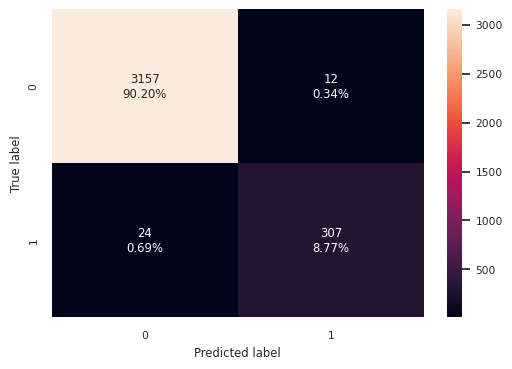

In [91]:
## To create confusion matrix for train data
confusion_matrix_sklearn(estimator, X_train, y_train)

In [92]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(estimator, X_train, y_train)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.989714,0.927492,0.962382,0.944615


In [93]:
calc_recall_score(estimator)

Accuracy on training set is:  0.9897142857142858
Accuracy on test set is:  0.9813333333333333
Recall on training set is:  0.9274924471299094
Recall on test set is:  0.8791946308724832
Precision on training set is:  0.9623824451410659
Precision on test set is:  0.9290780141843972
F1_score on training set is:  0.9446153846153847
F1_score on test set is:  0.9034482758620689


**Visualizing the Decision Tree**

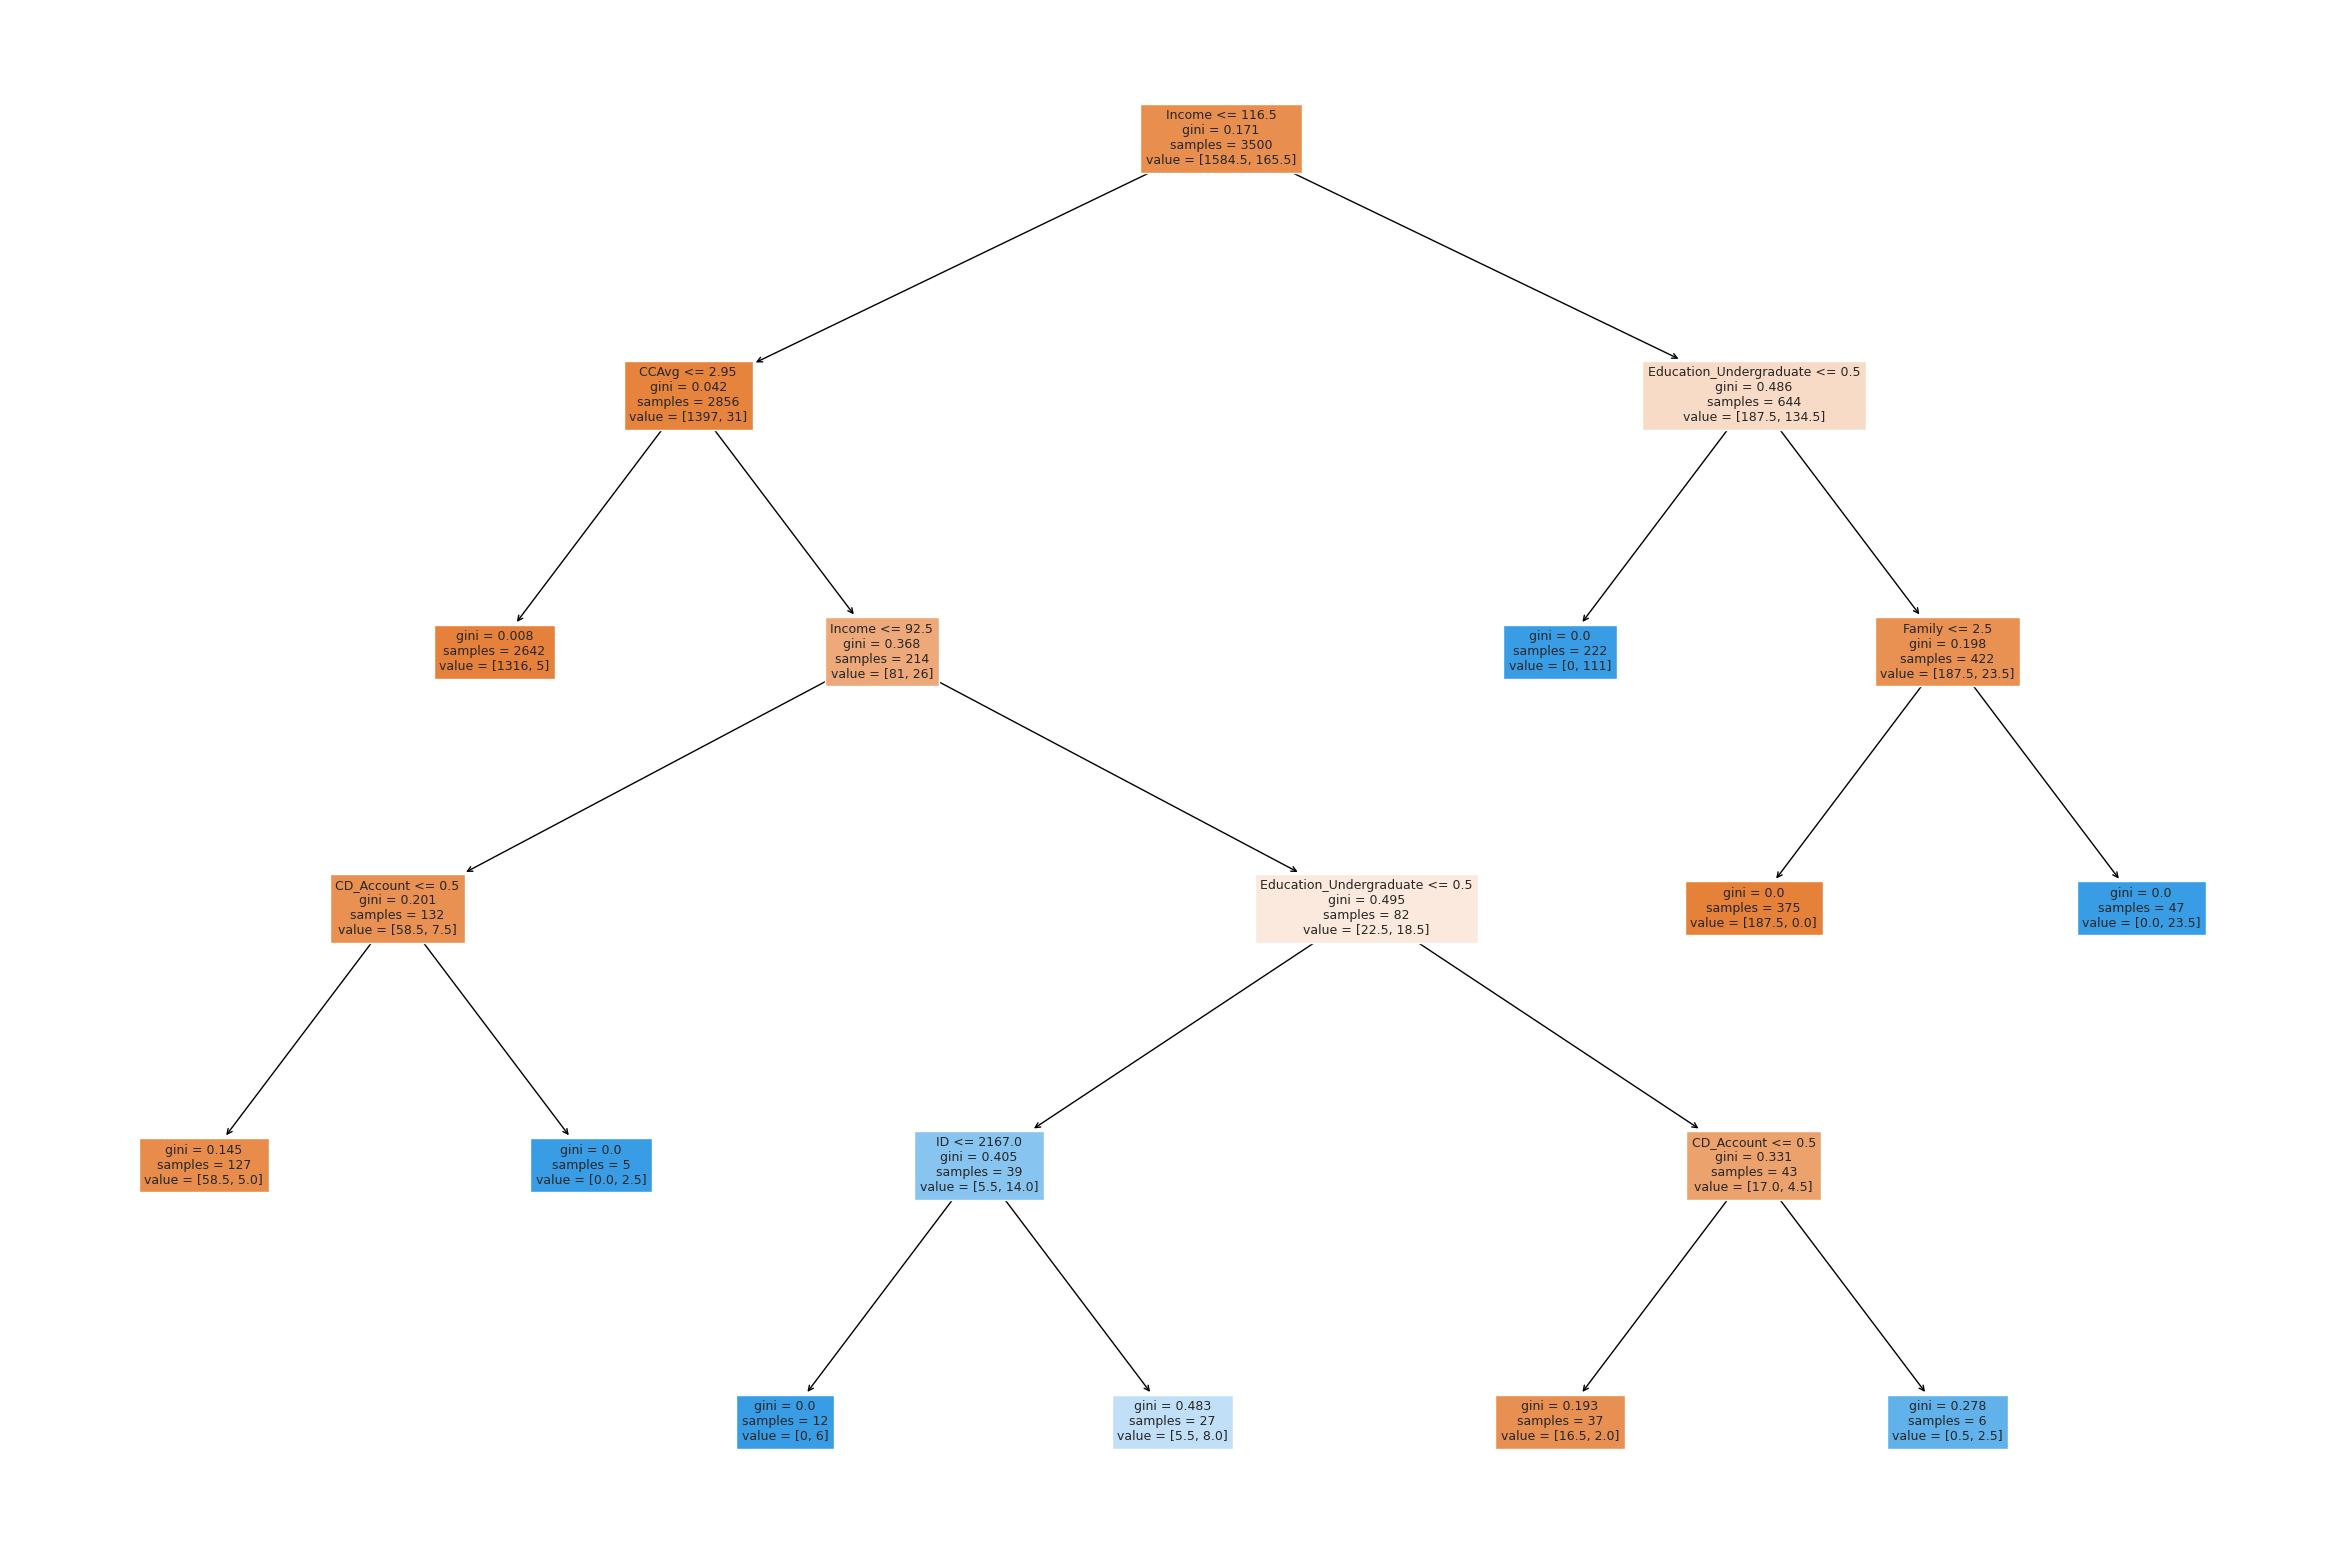

In [94]:
plt.figure(figsize=(30, 20))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [95]:
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1316.00, 5.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- CD_Account <= 0.50
|   |   |   |   |--- weights: [58.50, 5.00] class: 0
|   |   |   |--- CD_Account >  0.50
|   |   |   |   |--- weights: [0.00, 2.50] class: 1
|   |   |--- Income >  92.50
|   |   |   |--- Education_Undergraduate <= 0.50
|   |   |   |   |--- ID <= 2167.00
|   |   |   |   |   |--- weights: [0.00, 6.00] class: 1
|   |   |   |   |--- ID >  2167.00
|   |   |   |   |   |--- weights: [5.50, 8.00] class: 1
|   |   |   |--- Education_Undergraduate >  0.50
|   |   |   |   |--- CD_Account <= 0.50
|   |   |   |   |   |--- weights: [16.50, 2.00] class: 0
|   |   |   |   |--- CD_Account >  0.50
|   |   |   |   |   |--- weights: [0.50, 2.50] class: 1
|--- Income >  116.50
|   |--- Education_Undergraduate <= 0.50
|   |   |--- weights: [0.00, 111.00] class: 1
|   |--- Education_Undergraduate >  0.50
|   |   |--- Family <= 2.50

In [96]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                              Imp
Education_Undergraduate  0.445708
Income                   0.327032
Family                   0.154915
CCAvg                    0.042015
CD_Account               0.025216
ID                       0.005115
Securities_Account       0.000000
Mortgage                 0.000000
Online                   0.000000
Age                      0.000000
ZIPCode_91               0.000000
ZIPCode_92               0.000000
ZIPCode_93               0.000000
ZIPCode_94               0.000000
ZIPCode_95               0.000000
ZIPCode_96               0.000000
Education_Professional   0.000000
CreditCard               0.000000


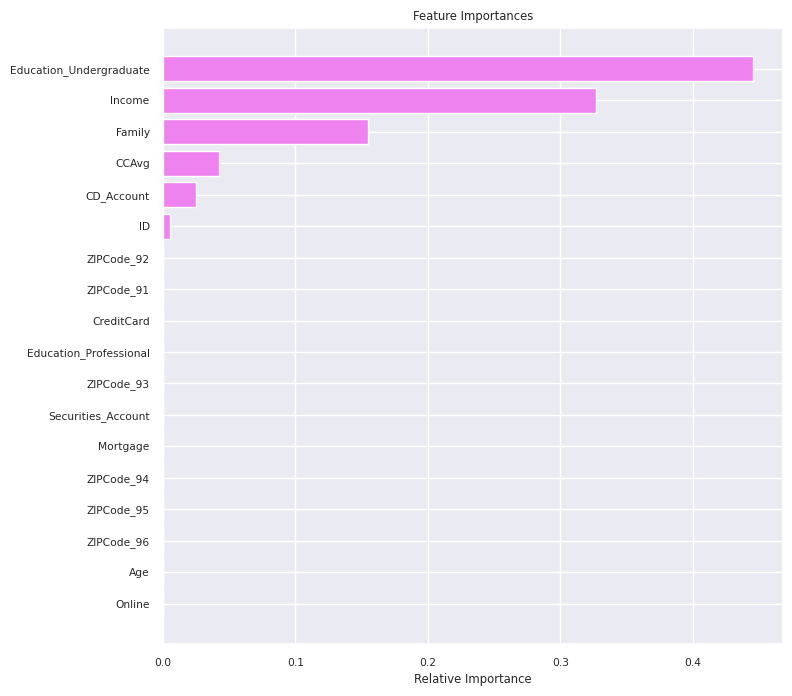

In [97]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Checking performance on test data**

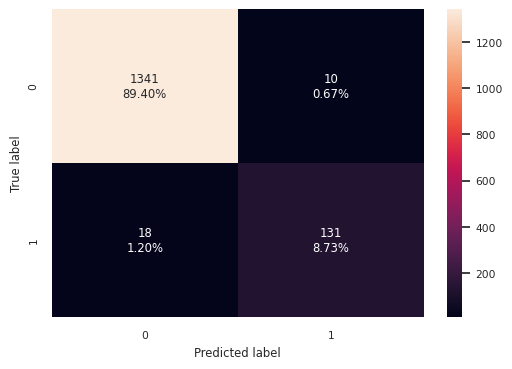

In [98]:
# To get the confusion matrix on test data
confusion_matrix_sklearn(estimator, X_test, y_test)

In [99]:
# Complete the code to get the model performance on test data
decision_tree_tune_perf_test = model_performance_classification_sklearn(estimator, X_test, y_test)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.981333,0.879195,0.929078,0.903448


In [100]:
calc_recall_score(estimator)

Accuracy on training set is:  0.9897142857142858
Accuracy on test set is:  0.9813333333333333
Recall on training set is:  0.9274924471299094
Recall on test set is:  0.8791946308724832
Precision on training set is:  0.9623824451410659
Precision on test set is:  0.9290780141843972
F1_score on training set is:  0.9446153846153847
F1_score on test set is:  0.9034482758620689


#### Cost-Complexity Pruning

In [101]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [102]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000223,0.001114
2,0.000268,0.002188
3,0.000273,0.003824
4,0.000359,0.004900
5,0.000381,0.005280
6,0.000381,0.005661
7,0.000476,0.006138
8,0.000515,0.007168
9,0.000527,0.007696


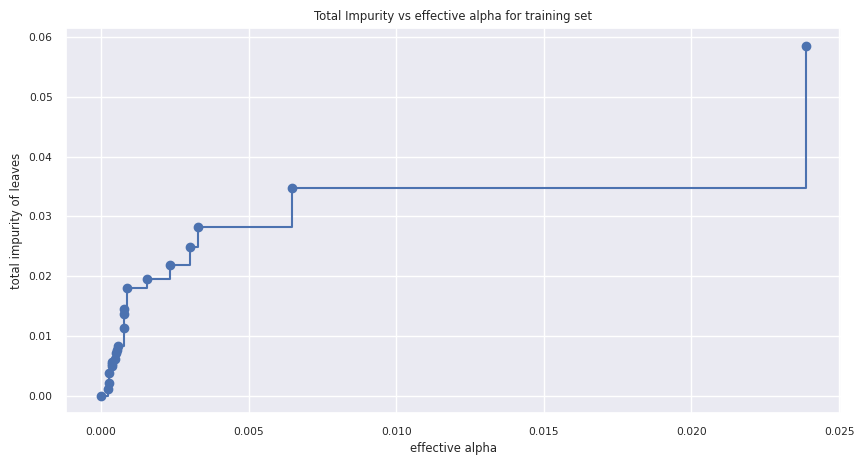

In [103]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [104]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)     ## Complete the code to fit decision tree on training data
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.056364969335601575


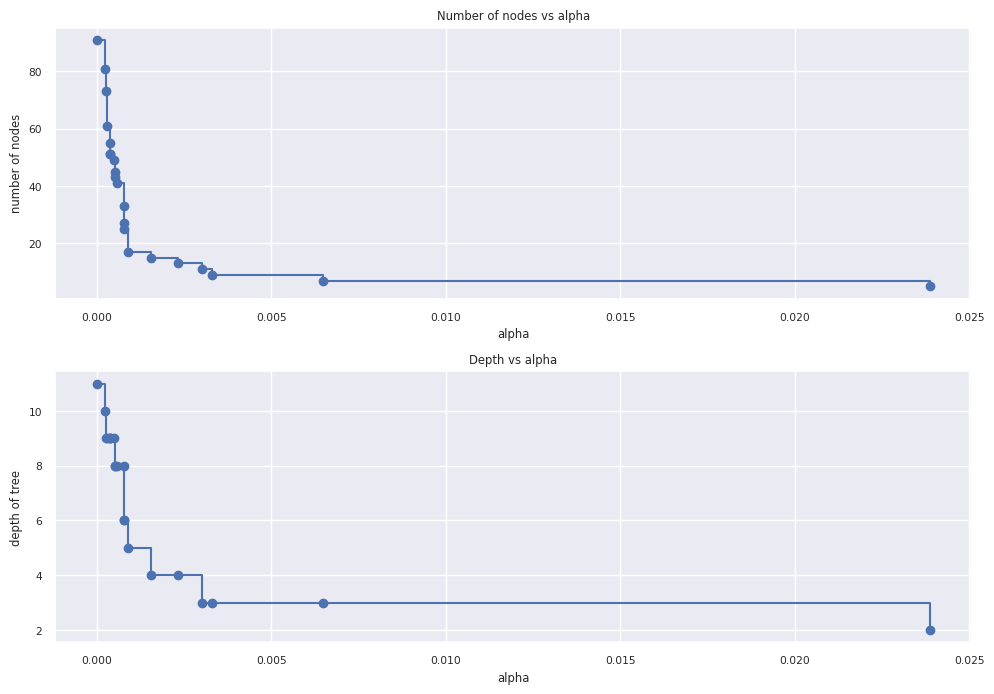

In [105]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

**Recall vs alpha for training and testing sets**

In [106]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

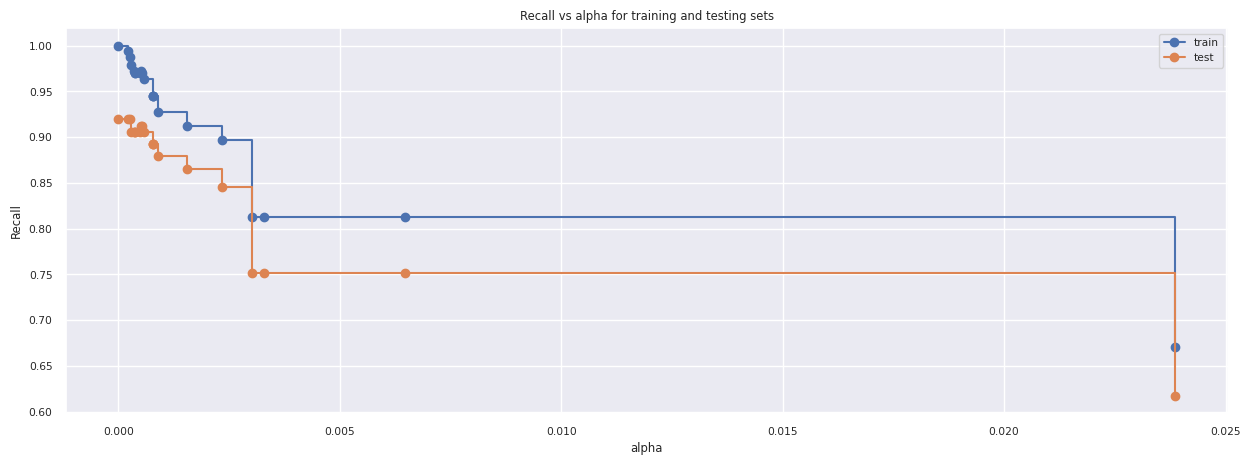

In [107]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [108]:
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(random_state=1)


#### Post-Purning

In [109]:
estimator_2 = DecisionTreeClassifier(
    ccp_alpha=ccp_alphas[-1], class_weight={0: 0.15, 1: 0.85}, random_state=1         ## Complete the code by adding the correct ccp_alpha value
)
estimator_2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.02386594448205822,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)

**Checking performance on training data**

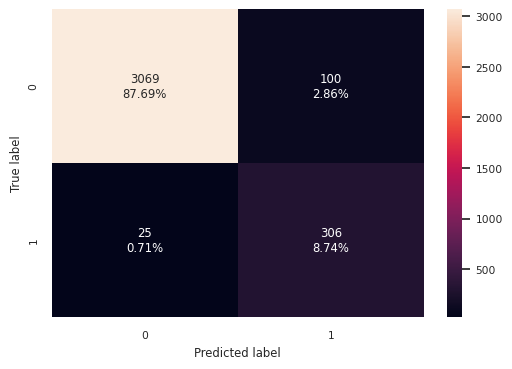

In [110]:
## To create confusion matrix for train data
confusion_matrix_sklearn(estimator_2,X_train,y_train)

In [111]:
decision_tree_tune_post_train = model_performance_classification_sklearn(estimator_2,X_train,y_train)
decision_tree_tune_post_train

,Accuracy,Recall,Precision,F1
0,0.964286,0.924471,0.753695,0.830393


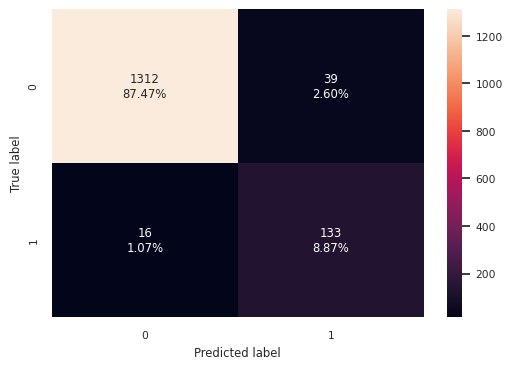

In [112]:
confusion_matrix_sklearn(estimator_2,X_test,y_test)

In [113]:
# Complete the code to get the model performance on test data
decision_tree_tune_post_test = model_performance_classification_sklearn(estimator_2,X_test,y_test)
decision_tree_tune_post_test

,Accuracy,Recall,Precision,F1
0,0.963333,0.892617,0.773256,0.82866


In [114]:
calc_recall_score(estimator_2)

Accuracy on training set is:  0.9642857142857143
Accuracy on test set is:  0.9633333333333334
Recall on training set is:  0.9244712990936556
Recall on test set is:  0.8926174496644296
Precision on training set is:  0.7536945812807881
Precision on test set is:  0.7732558139534884
F1_score on training set is:  0.8303934871099049
F1_score on test set is:  0.8286604361370716


**Visualizing the Decision Tree**

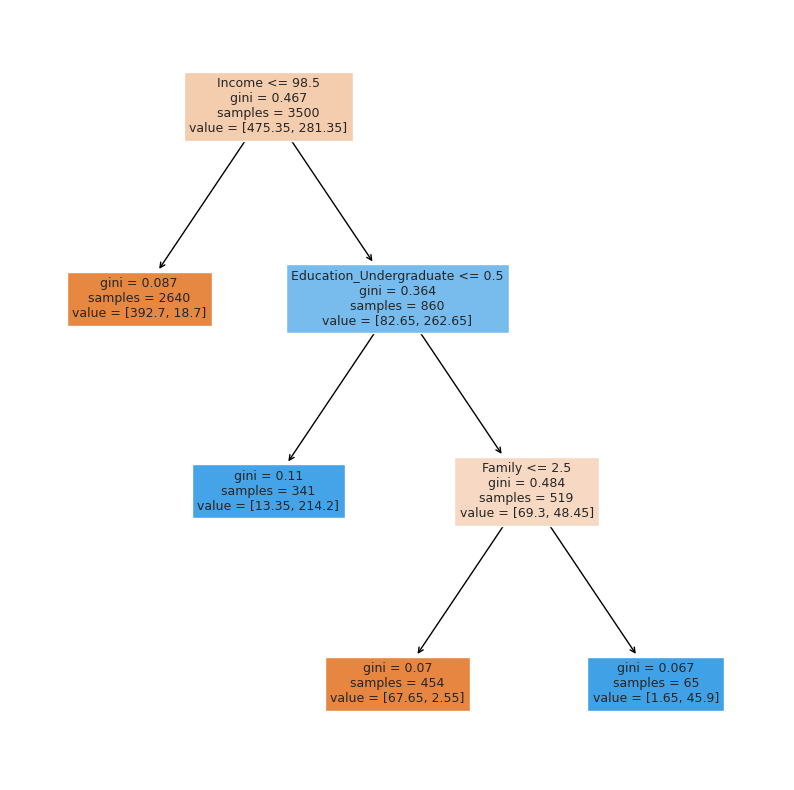

In [115]:
plt.figure(figsize=(10, 10))
out = tree.plot_tree(
    estimator_2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [116]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator_2, feature_names=feature_names, show_weights=True))

|--- Income <= 98.50
|   |--- weights: [392.70, 18.70] class: 0
|--- Income >  98.50
|   |--- Education_Undergraduate <= 0.50
|   |   |--- weights: [13.35, 214.20] class: 1
|   |--- Education_Undergraduate >  0.50
|   |   |--- Family <= 2.50
|   |   |   |--- weights: [67.65, 2.55] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- weights: [1.65, 45.90] class: 1



In [117]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator_2.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                              Imp
Income                   0.674921
Family                   0.171953
Education_Undergraduate  0.153126
ZIPCode_91               0.000000
Education_Professional   0.000000
ZIPCode_96               0.000000
ZIPCode_95               0.000000
ZIPCode_94               0.000000
ZIPCode_93               0.000000
ZIPCode_92               0.000000
ID                       0.000000
Age                      0.000000
Online                   0.000000
CD_Account               0.000000
Securities_Account       0.000000
Mortgage                 0.000000
CCAvg                    0.000000
CreditCard               0.000000


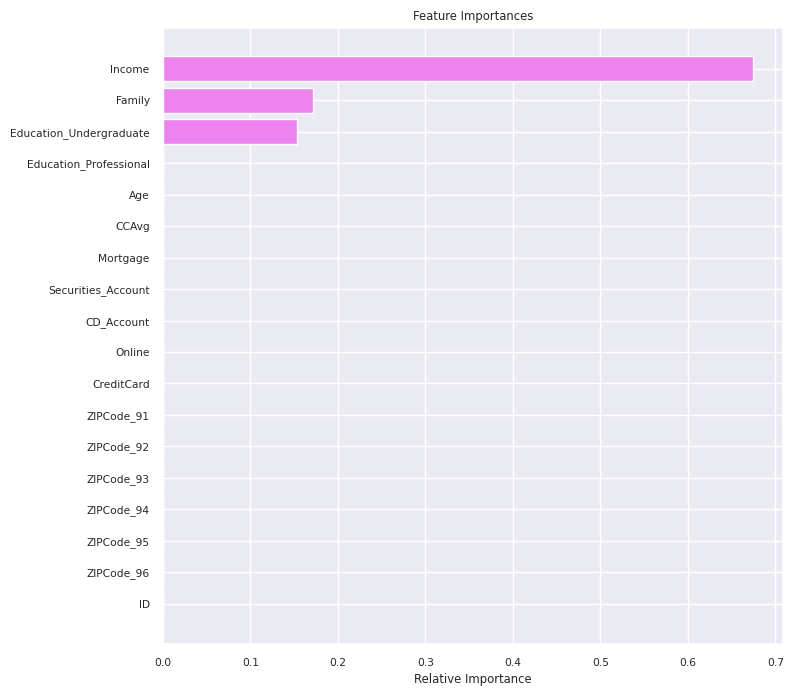

In [118]:
importances = estimator_2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Model Performance Comparison

In [119]:
# training performance comparison

models_train_comp_df = pd.concat(
    [decision_tree_perf_train.T, decision_tree_tune_perf_train.T,decision_tree_tune_post_train.T], axis=1,
)
models_train_comp_df.columns = ["Decision Tree sklearn", "Decision Tree (Pre-Pruning)","Decision Tree (Post-Pruning)"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.0,0.989714,0.964286
Recall,1.0,0.927492,0.924471
Precision,1.0,0.962382,0.753695
F1,1.0,0.944615,0.830393


In [120]:
# testing performance comparison

models_train_comp_df = pd.concat(
    [decision_tree_perf_test.T, decision_tree_tune_perf_test.T,decision_tree_tune_post_test.T], axis=1,
)
models_train_comp_df.columns = ["Decision Tree sklearn", "Decision Tree (Pre-Pruning)","Decision Tree (Post-Pruning)"]
print("Testing performance comparison:")
models_train_comp_df

Testing performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.980667,0.981333,0.963333
Recall,0.919463,0.879195,0.892617
Precision,0.889610,0.929078,0.773256
F1,0.904290,0.903448,0.828660


## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

### Summary

The analysis started with Exploratory Data Analysis (EDA) to get insight into the dataset and understand possible correlations. A Decision Tree Classifier method was used to build a model to predict customers engagement with the bank and specially in the context of personal loan. Multiple decision trees were developed and visualized to get an insight into model performance. Important features were identified by looking at how often they are used in the tree's decision-making process. The hyperparameter tuning and pruning techniques were carried out to mitigate model over fitting and building an optimized model.

### Recommendations
1. Income, average spending on credit cards per month, having a certificate of deposit account show positive correlations with accepting an offer of Personal loan.
2. Customers with advanced/professional degrees have the highest inclination toward accepting a Personal Loan offer.
3. Customers with Family size of 3 have the highest chance of approving an offer of personal loan.
4. Almost 50% of customers with a Certificate of Deposit CD account accepted a personal loan offer.
5. 75% of customers who approved a personal offer are mainly between 35 to 65 years old. It is less likely to accept the offer of personal loan for customers ages below 25 and above 65.
6. 75% of customers who approved a personal loan offer have between 10 and 30 years of experience.
7. 75% of customers who approved a personal loan have mainly income of above 120k dollars. There is a correlation between the Income and Personal_Loan approvals and that increases by increasing income and vice versa.
8. 75% of customers who approved a personal loan have mainly Average Credit Card usuage of between about 2200 and 5000 dollars.
9. Education, Income, family size and average spending on credit cards are the foremost predictors and features of client inclination to pursue a personal loan.
10. The bank needs to allocate their focus toward clients with the highest income, advanced degree holders, family size of three and higher average credit card spending users.
11. In finance studies, the impact of False Negative (FN) in total losses is greater than the impact of False Positives (FP) and therefore Recall seems to be the best score, therefore, the goal is to maximise the recall.
12. Among different decision tree models, the Decision Tree has the highest recall score while pre-puning has the least recall score. Using full decision tree model is computationally demanding and therefore using simpler and faster of the post-pruning model could be a good choice.